In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import optuna
import xgboost as xgb
import catboost
from catboost import CatBoostRegressor
import shap

import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


In [4]:
train_wOnlyDummiesNoDrop = pd.read_csv('~/Documents/AmesHousingML/data_cleaning/data_dummies_noDrop.csv') 
frame = train_wOnlyDummiesNoDrop.copy()

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [14]:
dataset = 'dummifiedNoDrop'
model_name = 'catboost'
trial = "onlyNormalCondition"
data_process = f"{dataset}_{trial}"
        

#below is filtering out the houses that sold in normal condition

frame = frame[frame['SaleCondition_Normal'] == 1.0]

#the features will be X (independent variables)
X = frame.drop('SalePrice', axis=1)
X_array = X.values
#the target (dependent variable) will be y
y = frame['SalePrice']
y_array = y.values

# params = {'iterations': 499, 'learning_rate': 0.0875029872444346, 'depth': 5, 'loss_function': 'RMSE', 'random_seed': 42} Mean R^2: 0.9491209951386228 
params = {'iterations': 434, 'learning_rate': 0.10599212903564667, 'depth': 5, 'loss_function': 'RMSE', 'random_seed': 42}

#Input parameters into the model
best_model = CatBoostRegressor(**params)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')

def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Define the scoring function using neg_mean_squared_error
scorer = make_scorer(rmse_scorer)

# Use cross_val_score with the defined scorer
rmse_scores = cross_val_score(best_model, X, y, cv=kf, scoring=scorer)


0:	learn: 63387.5913987	total: 1.97ms	remaining: 852ms
1:	learn: 59038.7428436	total: 3.51ms	remaining: 758ms
2:	learn: 55146.8136484	total: 5.17ms	remaining: 743ms
3:	learn: 51538.8285271	total: 7ms	remaining: 753ms
4:	learn: 48206.4370746	total: 9.19ms	remaining: 789ms
5:	learn: 45188.3123980	total: 11.1ms	remaining: 790ms
6:	learn: 42687.0753543	total: 13.1ms	remaining: 800ms
7:	learn: 40323.2345785	total: 14.9ms	remaining: 793ms
8:	learn: 38160.9607223	total: 17.6ms	remaining: 833ms
9:	learn: 36245.9697482	total: 21.8ms	remaining: 926ms
10:	learn: 34619.3519759	total: 24.5ms	remaining: 944ms
11:	learn: 33125.3677865	total: 26.8ms	remaining: 942ms
12:	learn: 31725.8116289	total: 28.9ms	remaining: 935ms
13:	learn: 30352.3259741	total: 30.6ms	remaining: 919ms
14:	learn: 29162.8305331	total: 32.4ms	remaining: 905ms
15:	learn: 28064.0470120	total: 34ms	remaining: 888ms
16:	learn: 27021.2352883	total: 35.6ms	remaining: 873ms
17:	learn: 26117.2359648	total: 37.6ms	remaining: 869ms
18:	lea

In [15]:
# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores, '\n')
# Print the mean and standard deviation of the scores
print(f"Mean R^2: {cv_scores.mean()}", '\n') 

Cross-Validation Scores: [0.95320842 0.95714881 0.93511468 0.94769147 0.95343353] 

Mean R^2: 0.9493193831212242 



In [17]:
 #Split your training and testing sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test)

0:	learn: 63387.5913987	total: 2.59ms	remaining: 1.12s
1:	learn: 59236.2016427	total: 4.96ms	remaining: 1.07s
2:	learn: 55075.6381934	total: 6.46ms	remaining: 927ms
3:	learn: 51439.2489619	total: 8.17ms	remaining: 878ms
4:	learn: 48300.3017377	total: 10.3ms	remaining: 885ms
5:	learn: 45547.5103486	total: 12.1ms	remaining: 860ms
6:	learn: 43043.5575646	total: 14.3ms	remaining: 872ms
7:	learn: 40676.9349038	total: 17.1ms	remaining: 913ms
8:	learn: 38314.8355969	total: 19ms	remaining: 898ms
9:	learn: 36510.1821380	total: 21ms	remaining: 890ms
10:	learn: 34869.9384131	total: 22.9ms	remaining: 882ms
11:	learn: 33314.0137921	total: 25ms	remaining: 879ms
12:	learn: 31867.3741980	total: 26.4ms	remaining: 855ms
13:	learn: 30489.4082781	total: 27.9ms	remaining: 837ms
14:	learn: 29246.0453557	total: 29.6ms	remaining: 826ms
15:	learn: 28112.1811405	total: 31.8ms	remaining: 830ms
16:	learn: 27169.0506836	total: 33.2ms	remaining: 814ms
17:	learn: 26316.6660107	total: 34.7ms	remaining: 803ms
18:	lear

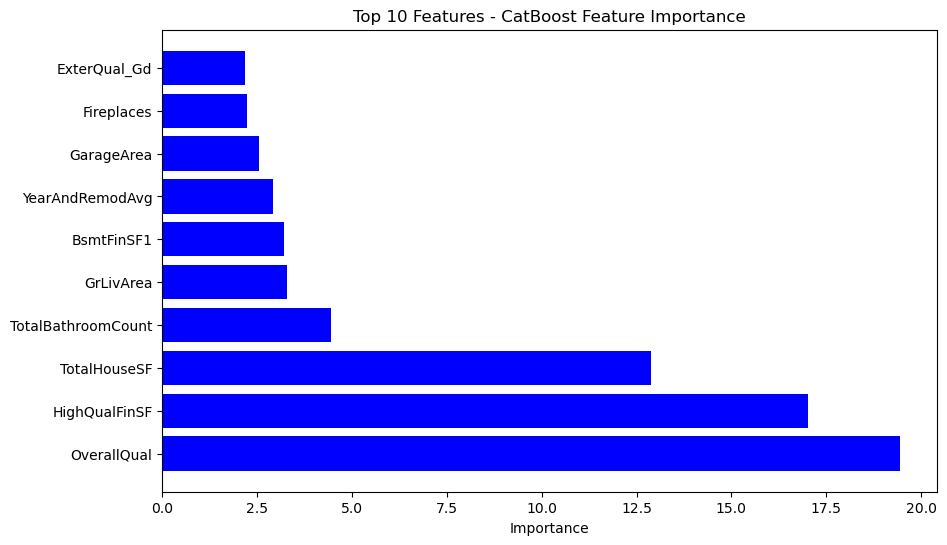

In [23]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
feature_importance = best_model.get_feature_importance()

# Get feature names from the training dataset
your_feature_names = X.columns  # Replace 'X' with your feature matrix

# Create a DataFrame for better handling
feature_importance_df = pd.DataFrame({'Feature': your_feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot feature importance for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Features - CatBoost Feature Importance')
plt.show()

In [ ]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_tree(tree_idx=0, pool=None, figsize=(20, 10), show_info=['InternalValue', 'LeafCount'])


In [ ]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_metric(iterations=None, metric='RMSE')


In [ ]:
# Assuming you have a trained CatBoostRegressor model named 'catboost_model'
best_model.plot_predictions(pool=None, prediction_type='RawFormulaVal', iterations=None, aspect_ratio=0.5)


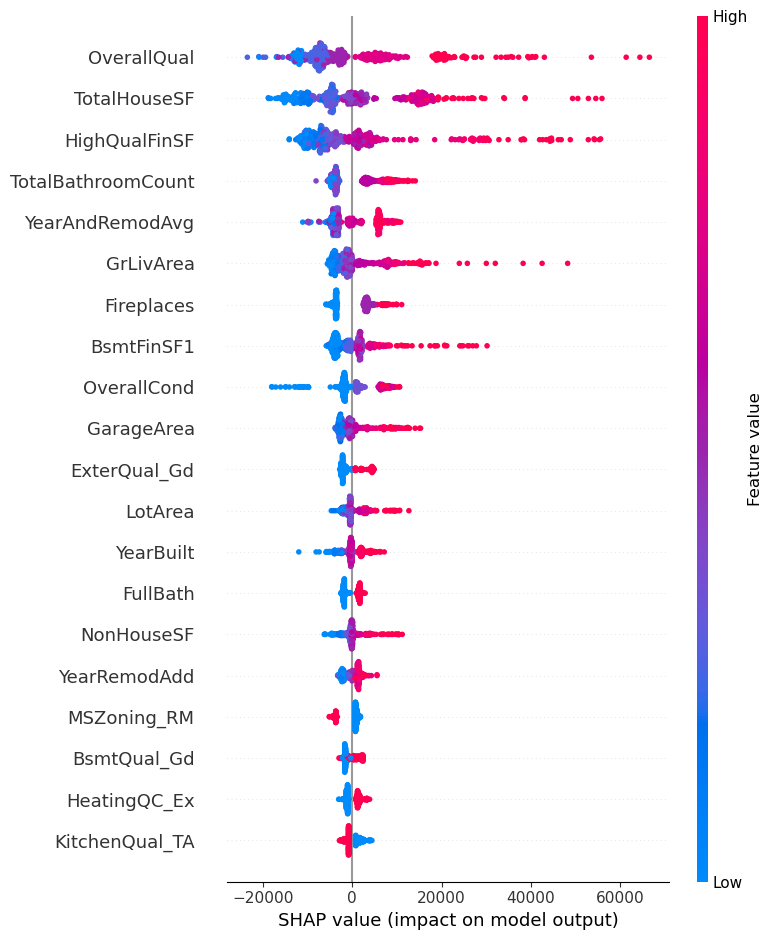

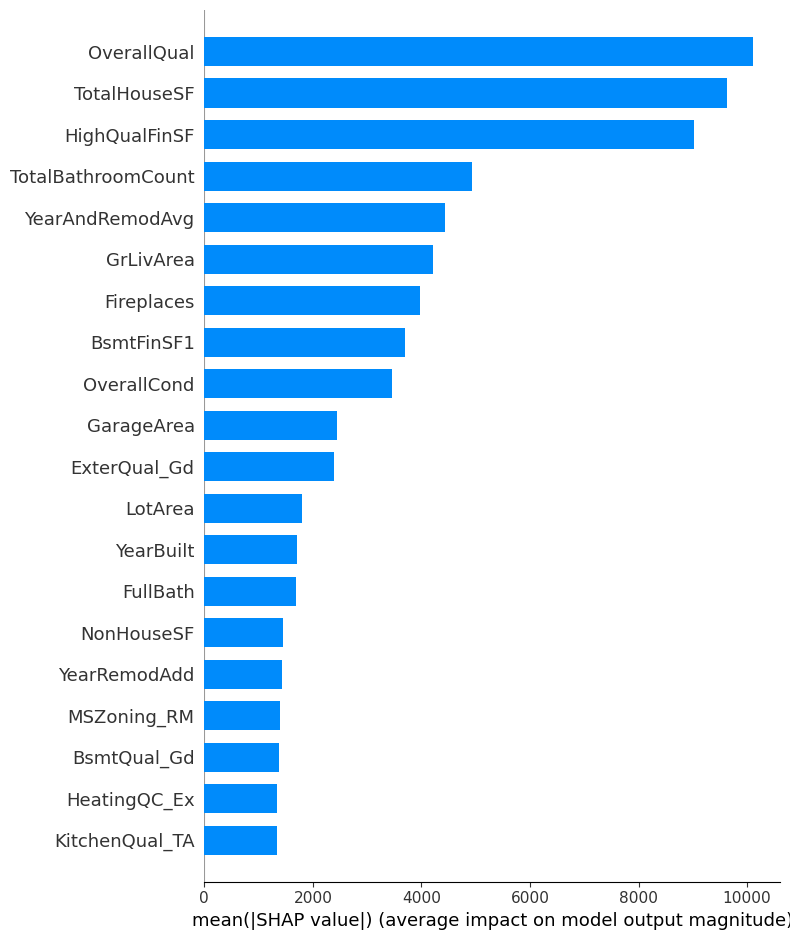

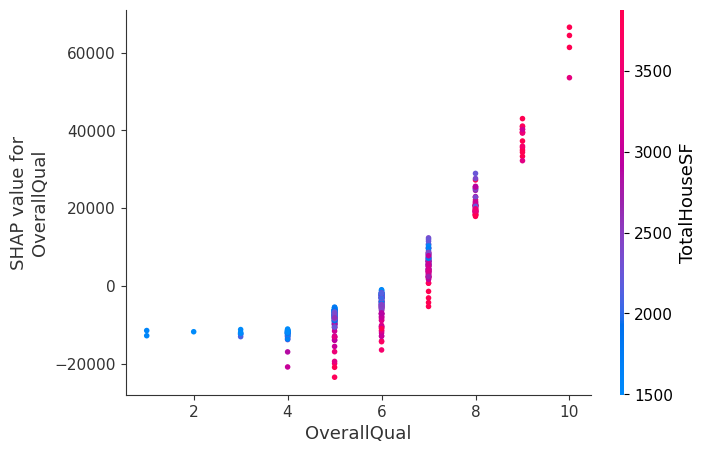

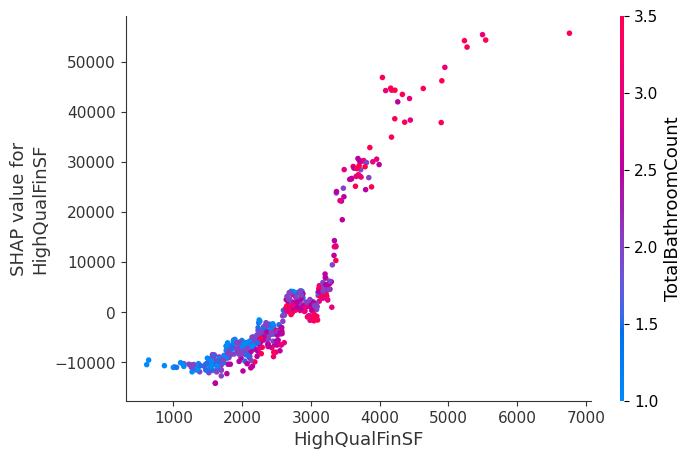

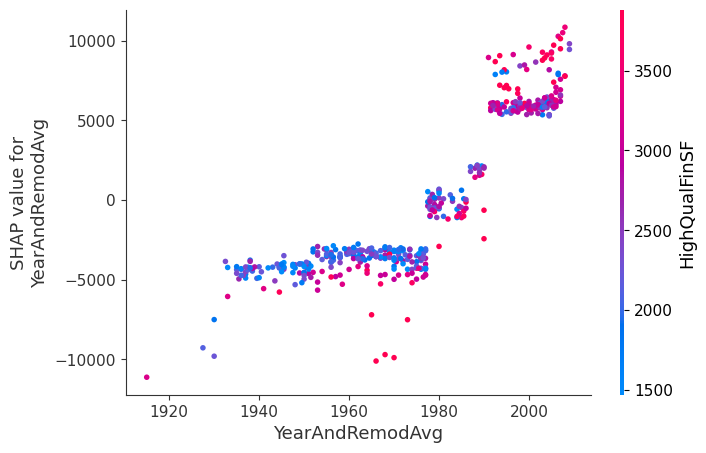

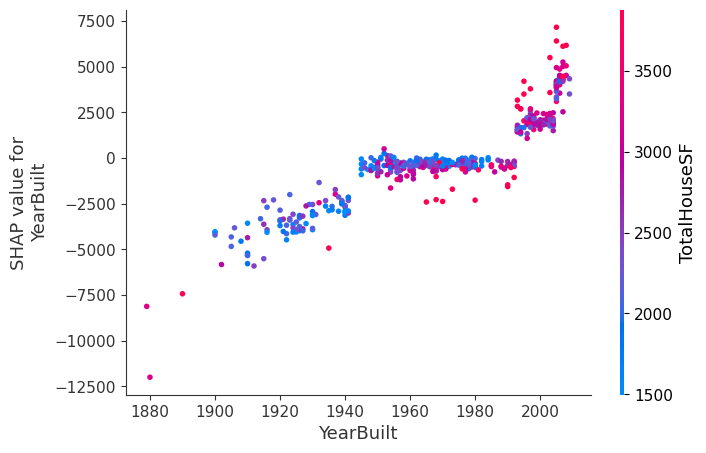

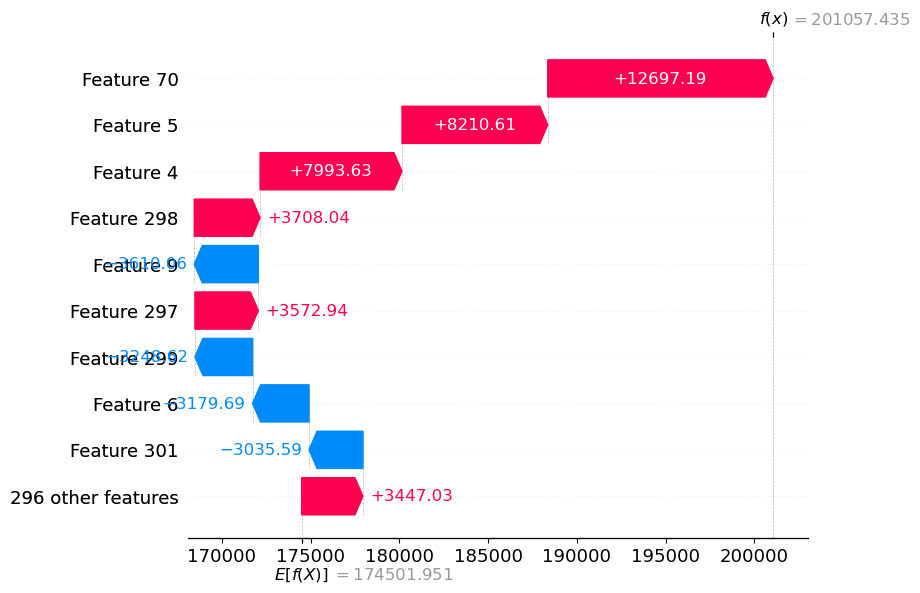

In [22]:
# Use the SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for a subset of the data (e.g., test set)
shap_values = explainer.shap_values(X_test)

# 1. Summary Plot
shap.summary_plot(shap_values, X_test)

# 2. Summary Bar Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 3. Dependence Plot
shap.dependence_plot("OverallQual", shap_values, X_test)
shap.dependence_plot("HighQualFinSF", shap_values, X_test)
#shap.dependence_plot("KitchenQual", shap_values, X_test)
shap.dependence_plot("YearAndRemodAvg", shap_values, X_test)
shap.dependence_plot("YearBuilt", shap_values, X_test)


# 4. Force Plot (for a specific prediction)
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

# 5. Waterfall Plot (for a specific prediction)
shap.waterfall_plot(shap.Explanation(values=shap_values[0, :], base_values=explainer.expected_value), max_display=10)


In [28]:
X.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAlley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType

In [25]:
pool = Pool(X, y, 

AttributeError: 'CatBoostRegressor' object has no attribute 'params'

In [10]:
# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 50, 500),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'depth': trial.suggest_int('depth', 4, 10),
#     }

#     model = CatBoostRegressor(**params, random_state=42)
#     model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=10)

#     predictions = model.predict(X_test)
#     mse = mean_squared_error(y_test, predictions)
#     return mse

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# opt_params = study.best_params
# opt_model.fit(X_test,y_test)
# opt_pred = opt_model.predict(X_test)

[I 2024-02-04 17:26:56,628] A new study created in memory with name: no-name-2b1d4ea9-9270-48d5-bb54-2e3b0dd0209d


0:	learn: 60440.1370814	test: 71307.7238123	best: 71307.7238123 (0)	total: 2.29ms	remaining: 270ms
10:	learn: 26860.1087101	test: 35214.0607525	best: 35214.0607525 (10)	total: 19.8ms	remaining: 194ms
20:	learn: 19360.5599557	test: 25990.1968224	best: 25990.1968224 (20)	total: 36.5ms	remaining: 170ms
30:	learn: 16878.9136375	test: 22362.9014079	best: 22362.9014079 (30)	total: 51.3ms	remaining: 146ms
40:	learn: 15342.2825556	test: 20572.0520508	best: 20572.0520508 (40)	total: 66ms	remaining: 126ms
50:	learn: 14213.0082321	test: 19546.9961881	best: 19546.9961881 (50)	total: 99.3ms	remaining: 132ms
60:	learn: 13413.2163302	test: 19064.9181945	best: 19064.9181945 (60)	total: 159ms	remaining: 151ms


[I 2024-02-04 17:26:56,953] Trial 0 finished with value: 329571458.11690813 and parameters: {'iterations': 119, 'learning_rate': 0.16845179656572773, 'depth': 5}. Best is trial 0 with value: 329571458.11690813.


70:	learn: 12729.5172584	test: 18839.9040805	best: 18822.3811924 (69)	total: 209ms	remaining: 142ms
80:	learn: 12036.7352828	test: 18575.6564604	best: 18575.6564604 (80)	total: 223ms	remaining: 105ms
90:	learn: 11512.1529514	test: 18336.6481083	best: 18336.6481083 (90)	total: 238ms	remaining: 73.2ms
100:	learn: 10924.3334768	test: 18259.1832570	best: 18259.1832570 (100)	total: 255ms	remaining: 45.5ms
110:	learn: 10609.2429752	test: 18218.8241995	best: 18218.8241995 (110)	total: 269ms	remaining: 19.4ms
118:	learn: 10307.7068716	test: 18202.4089126	best: 18154.1030656 (115)	total: 281ms	remaining: 0us

bestTest = 18154.10307
bestIteration = 115

Shrink model to first 116 iterations.
0:	learn: 54870.4729224	test: 65519.9723577	best: 65519.9723577 (0)	total: 3.13ms	remaining: 1.18s
10:	learn: 19721.6462428	test: 26766.0003119	best: 26766.0003119 (10)	total: 23.8ms	remaining: 791ms
20:	learn: 15915.0927283	test: 22186.3316229	best: 22186.3316229 (20)	total: 41.7ms	remaining: 707ms
30:	learn

[I 2024-02-04 17:26:57,202] Trial 1 finished with value: 375498273.0131684 and parameters: {'iterations': 377, 'learning_rate': 0.28958842061478945, 'depth': 6}. Best is trial 0 with value: 329571458.11690813.


60:	learn: 10287.0249594	test: 19708.1178267	best: 19708.1178267 (60)	total: 120ms	remaining: 619ms
70:	learn: 9530.2954564	test: 19659.7951609	best: 19616.1272777 (65)	total: 140ms	remaining: 601ms
80:	learn: 8853.5780545	test: 19599.3716093	best: 19599.3716093 (80)	total: 159ms	remaining: 579ms
90:	learn: 8234.9028597	test: 19479.7401624	best: 19479.7401624 (90)	total: 178ms	remaining: 558ms
100:	learn: 7782.2042037	test: 19384.1335481	best: 19382.2185893 (97)	total: 196ms	remaining: 536ms
110:	learn: 7305.5046220	test: 19441.2331049	best: 19377.7778141 (104)	total: 216ms	remaining: 517ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19377.77781
bestIteration = 104

Shrink model to first 105 iterations.
0:	learn: 61129.7934948	test: 72341.8524614	best: 72341.8524614 (0)	total: 5.86ms	remaining: 2.11s
10:	learn: 26334.7433769	test: 37310.5140452	best: 37310.5140452 (10)	total: 53.8ms	remaining: 1.71s
20:	learn: 17842.5518801	test: 28187.0290560	best: 28187.0290560 

[I 2024-02-04 17:26:57,681] Trial 2 finished with value: 449803341.5063499 and parameters: {'iterations': 361, 'learning_rate': 0.15901780046079522, 'depth': 8}. Best is trial 0 with value: 329571458.11690813.


70:	learn: 10088.0464392	test: 21394.7100347	best: 21394.7100347 (70)	total: 326ms	remaining: 1.33s
80:	learn: 9272.2270375	test: 21307.4419972	best: 21307.4419972 (80)	total: 367ms	remaining: 1.27s
90:	learn: 8629.6651919	test: 21208.5676439	best: 21208.5676439 (90)	total: 411ms	remaining: 1.22s
100:	learn: 7945.7082452	test: 21217.2419066	best: 21208.5676439 (90)	total: 456ms	remaining: 1.17s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 21208.56764
bestIteration = 90

Shrink model to first 91 iterations.
0:	learn: 62606.9877462	test: 73609.5554238	best: 73609.5554238 (0)	total: 1.34ms	remaining: 626ms
10:	learn: 32390.9461296	test: 41698.7816187	best: 41698.7816187 (10)	total: 14.1ms	remaining: 584ms
20:	learn: 22321.8938467	test: 29627.7432613	best: 29627.7432613 (20)	total: 26.4ms	remaining: 563ms
30:	learn: 18485.3740891	test: 24073.1537727	best: 24073.1537727 (30)	total: 39.5ms	remaining: 557ms
40:	learn: 16630.0843428	test: 21932.2434394	best: 21932.2434394 

[I 2024-02-04 17:26:57,961] Trial 3 finished with value: 303186081.2591778 and parameters: {'iterations': 468, 'learning_rate': 0.12240852120318961, 'depth': 5}. Best is trial 3 with value: 303186081.2591778.


200:	learn: 9438.3554195	test: 17415.2168848	best: 17412.2394097 (194)	total: 254ms	remaining: 338ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17412.23941
bestIteration = 194

Shrink model to first 195 iterations.
0:	learn: 64908.7690658	test: 76089.9211234	best: 76089.9211234 (0)	total: 889us	remaining: 200ms
10:	learn: 41594.1076492	test: 51183.0473225	best: 51183.0473225 (10)	total: 9.37ms	remaining: 183ms
20:	learn: 30292.2994668	test: 38758.3657504	best: 38758.3657504 (20)	total: 18.8ms	remaining: 183ms
30:	learn: 24535.6966672	test: 32005.5123714	best: 32005.5123714 (30)	total: 28.1ms	remaining: 177ms
40:	learn: 21398.6221001	test: 27625.9517970	best: 27625.9517970 (40)	total: 37.6ms	remaining: 170ms
50:	learn: 19315.3236953	test: 24529.3812349	best: 24529.3812349 (50)	total: 46.6ms	remaining: 160ms
60:	learn: 18080.0886490	test: 22725.8036238	best: 22725.8036238 (60)	total: 55.4ms	remaining: 150ms
70:	learn: 17090.9861826	test: 21553.5373447	best: 21553.5

[I 2024-02-04 17:26:58,195] Trial 4 finished with value: 319049544.04906523 and parameters: {'iterations': 226, 'learning_rate': 0.07517093520297727, 'depth': 4}. Best is trial 3 with value: 303186081.2591778.


190:	learn: 12458.5832645	test: 18037.0765927	best: 18037.0765927 (190)	total: 179ms	remaining: 32.9ms
200:	learn: 12280.7387685	test: 17977.9346878	best: 17977.9346878 (200)	total: 189ms	remaining: 23.5ms
210:	learn: 12094.6615556	test: 17932.0451877	best: 17932.0451877 (210)	total: 199ms	remaining: 14.2ms
220:	learn: 11880.6744211	test: 17923.5040812	best: 17903.2785582 (213)	total: 209ms	remaining: 4.73ms
225:	learn: 11792.1154534	test: 17861.9580127	best: 17861.9580127 (225)	total: 214ms	remaining: 0us

bestTest = 17861.95801
bestIteration = 225

0:	learn: 57418.6065504	test: 68569.9432723	best: 68569.9432723 (0)	total: 7.63ms	remaining: 2.62s
10:	learn: 20333.2812778	test: 30220.2760340	best: 30220.2760340 (10)	total: 56.4ms	remaining: 1.71s
20:	learn: 15317.9049046	test: 24420.2053662	best: 24420.2053662 (20)	total: 105ms	remaining: 1.63s
30:	learn: 12965.0220641	test: 23125.4606599	best: 23125.4606599 (30)	total: 151ms	remaining: 1.53s
40:	learn: 11658.6148696	test: 22137.004261

[I 2024-02-04 17:26:58,608] Trial 5 finished with value: 465205301.8215648 and parameters: {'iterations': 345, 'learning_rate': 0.24146751799942903, 'depth': 8}. Best is trial 3 with value: 303186081.2591778.
[I 2024-02-04 17:26:58,777] Trial 6 finished with value: 359557414.5382478 and parameters: {'iterations': 389, 'learning_rate': 0.28500844336139525, 'depth': 5}. Best is trial 3 with value: 303186081.2591778.


80:	learn: 7128.7675448	test: 21597.9539815	best: 21568.6184495 (72)	total: 380ms	remaining: 1.24s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 21568.61845
bestIteration = 72

Shrink model to first 73 iterations.
0:	learn: 55125.7415231	test: 65638.6186811	best: 65638.6186811 (0)	total: 1.3ms	remaining: 504ms
10:	learn: 20441.0897445	test: 26816.2874167	best: 26816.2874167 (10)	total: 12.8ms	remaining: 441ms
20:	learn: 16057.5494433	test: 21897.5326968	best: 21897.5326968 (20)	total: 24.9ms	remaining: 436ms
30:	learn: 14240.1505730	test: 20486.9132332	best: 20486.9132332 (30)	total: 37ms	remaining: 428ms
40:	learn: 12890.9838997	test: 19907.5760393	best: 19907.5760393 (40)	total: 50ms	remaining: 425ms
50:	learn: 12039.6421881	test: 19588.9884774	best: 19588.9884774 (50)	total: 62.4ms	remaining: 413ms
60:	learn: 11121.7993319	test: 19523.6540698	best: 19523.6540698 (60)	total: 75.8ms	remaining: 408ms
70:	learn: 10380.2325530	test: 19425.4356598	best: 19401.0090882 (

[I 2024-02-04 17:26:59,266] Trial 7 finished with value: 626727272.7097577 and parameters: {'iterations': 383, 'learning_rate': 0.28487636775491987, 'depth': 9}. Best is trial 3 with value: 303186081.2591778.


Stopped by overfitting detector  (10 iterations wait)

bestTest = 25034.52162
bestIteration = 49

Shrink model to first 50 iterations.
0:	learn: 66782.4157099	test: 78269.6427587	best: 78269.6427587 (0)	total: 10.1ms	remaining: 3.14s
10:	learn: 51961.8892770	test: 63114.3405183	best: 63114.3405183 (10)	total: 90.5ms	remaining: 2.47s
20:	learn: 41769.9589901	test: 53118.4246939	best: 53118.4246939 (20)	total: 167ms	remaining: 2.3s
30:	learn: 34259.6008546	test: 45481.9395327	best: 45481.9395327 (30)	total: 246ms	remaining: 2.22s
40:	learn: 28993.0228594	test: 40207.8600439	best: 40207.8600439 (40)	total: 321ms	remaining: 2.11s
50:	learn: 25180.4983802	test: 36215.1479627	best: 36215.1479627 (50)	total: 399ms	remaining: 2.03s
60:	learn: 22347.7973816	test: 33159.9456625	best: 33159.9456625 (60)	total: 480ms	remaining: 1.97s
70:	learn: 20156.9842646	test: 30972.5744333	best: 30972.5744333 (70)	total: 563ms	remaining: 1.9s
80:	learn: 18501.7995698	test: 29496.0524370	best: 29496.0524370 (8

[I 2024-02-04 17:27:01,830] Trial 8 finished with value: 483286185.9139844 and parameters: {'iterations': 311, 'learning_rate': 0.03740054799691559, 'depth': 9}. Best is trial 3 with value: 303186081.2591778.


300:	learn: 8980.0360993	test: 22038.1309380	best: 22038.1309380 (300)	total: 2.44s	remaining: 81.2ms
310:	learn: 8790.5057220	test: 21983.7709666	best: 21983.7709666 (310)	total: 2.52s	remaining: 0us

bestTest = 21983.77097
bestIteration = 310

0:	learn: 60454.3072750	test: 71387.0567399	best: 71387.0567399 (0)	total: 2.27ms	remaining: 525ms
10:	learn: 25736.9572591	test: 34828.5559095	best: 34828.5559095 (10)	total: 18.9ms	remaining: 380ms
20:	learn: 18645.4776537	test: 25585.7288260	best: 25585.7288260 (20)	total: 37ms	remaining: 372ms
30:	learn: 16079.3089974	test: 22164.4627343	best: 22164.4627343 (30)	total: 55.1ms	remaining: 357ms
40:	learn: 14560.5393605	test: 20733.1745595	best: 20733.1745595 (40)	total: 73.1ms	remaining: 341ms
50:	learn: 13639.7520429	test: 20079.7716762	best: 20079.7716762 (50)	total: 91.9ms	remaining: 326ms


[I 2024-02-04 17:27:02,108] Trial 9 finished with value: 347059999.5406385 and parameters: {'iterations': 232, 'learning_rate': 0.16801374375632583, 'depth': 6}. Best is trial 3 with value: 303186081.2591778.


60:	learn: 12623.9148676	test: 19690.6492889	best: 19690.6492889 (60)	total: 110ms	remaining: 310ms
70:	learn: 11872.2666151	test: 19296.5779467	best: 19296.2779967 (68)	total: 129ms	remaining: 292ms
80:	learn: 11148.2034586	test: 19065.0902964	best: 19065.0902964 (80)	total: 147ms	remaining: 273ms
90:	learn: 10559.9526601	test: 18983.7706118	best: 18970.8951101 (89)	total: 165ms	remaining: 256ms
100:	learn: 10049.0789113	test: 18908.0657580	best: 18908.0657580 (100)	total: 185ms	remaining: 240ms
110:	learn: 9702.3839760	test: 18843.2509633	best: 18840.5303166 (108)	total: 204ms	remaining: 222ms
120:	learn: 9167.1879614	test: 18770.2560680	best: 18770.2560680 (120)	total: 222ms	remaining: 204ms
130:	learn: 8767.3458998	test: 18629.5464126	best: 18629.5464126 (130)	total: 240ms	remaining: 185ms
140:	learn: 8388.7808994	test: 18629.6793253	best: 18629.5464126 (130)	total: 259ms	remaining: 167ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18629.54641
bestIteration = 

[I 2024-02-04 17:27:02,388] Trial 10 finished with value: 303855057.29117566 and parameters: {'iterations': 480, 'learning_rate': 0.09673542788766337, 'depth': 4}. Best is trial 3 with value: 303186081.2591778.


260:	learn: 10469.8613645	test: 17431.4387614	best: 17431.4387614 (260)	total: 241ms	remaining: 202ms
270:	learn: 10299.9373203	test: 17441.6243020	best: 17431.4387614 (260)	total: 252ms	remaining: 194ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17431.43876
bestIteration = 260

Shrink model to first 261 iterations.
0:	learn: 63912.0251746	test: 75043.9325435	best: 75043.9325435 (0)	total: 2.3ms	remaining: 1.12s
10:	learn: 37188.8079749	test: 46521.5577075	best: 46521.5577075 (10)	total: 11.8ms	remaining: 510ms
20:	learn: 26407.4098881	test: 33868.0725346	best: 33868.0725346 (20)	total: 21.4ms	remaining: 476ms
30:	learn: 21711.0151258	test: 27675.4681046	best: 27675.4681046 (30)	total: 30.8ms	remaining: 453ms
40:	learn: 19160.9715816	test: 24012.1228418	best: 24012.1228418 (40)	total: 41.4ms	remaining: 450ms
50:	learn: 17776.6581441	test: 22054.6343961	best: 22054.6343961 (50)	total: 52.2ms	remaining: 446ms
60:	learn: 16685.6771637	test: 20955.3925881	best: 20955

[I 2024-02-04 17:27:02,685] Trial 11 finished with value: 300192758.55130863 and parameters: {'iterations': 487, 'learning_rate': 0.09622999513324189, 'depth': 4}. Best is trial 11 with value: 300192758.55130863.


170:	learn: 12214.5002421	test: 17717.4023012	best: 17717.4023012 (170)	total: 170ms	remaining: 313ms
180:	learn: 11962.2357684	test: 17659.5238437	best: 17659.5238437 (180)	total: 181ms	remaining: 306ms
190:	learn: 11781.6480292	test: 17597.0120883	best: 17597.0120883 (190)	total: 190ms	remaining: 295ms
200:	learn: 11560.2894122	test: 17549.0776912	best: 17549.0776912 (200)	total: 200ms	remaining: 285ms
210:	learn: 11349.5769224	test: 17535.9660189	best: 17526.7757381 (204)	total: 211ms	remaining: 275ms
220:	learn: 11168.0068770	test: 17530.7950374	best: 17514.9913352 (217)	total: 219ms	remaining: 264ms
230:	learn: 10964.5822042	test: 17471.4271753	best: 17471.4271753 (230)	total: 230ms	remaining: 255ms
240:	learn: 10805.7229309	test: 17444.8834448	best: 17444.8834448 (240)	total: 239ms	remaining: 244ms
250:	learn: 10678.7188332	test: 17436.2863391	best: 17433.8166635 (247)	total: 248ms	remaining: 233ms
260:	learn: 10478.4819492	test: 17363.9786807	best: 17363.9786807 (260)	total: 257

[I 2024-02-04 17:27:02,906] Trial 12 finished with value: 306802279.43031037 and parameters: {'iterations': 487, 'learning_rate': 0.10619168661987384, 'depth': 4}. Best is trial 11 with value: 300192758.55130863.


80:	learn: 14741.4445637	test: 19353.2229683	best: 19353.2229683 (80)	total: 78.9ms	remaining: 396ms
90:	learn: 14253.0321658	test: 18871.1196771	best: 18871.1196771 (90)	total: 88.6ms	remaining: 385ms
100:	learn: 13792.9939741	test: 18456.5560771	best: 18456.5560771 (100)	total: 98.9ms	remaining: 378ms
110:	learn: 13329.1055702	test: 18211.8173204	best: 18211.8173204 (110)	total: 110ms	remaining: 371ms
120:	learn: 12981.8907929	test: 18088.2289573	best: 18084.4293590 (119)	total: 119ms	remaining: 360ms
130:	learn: 12650.5926257	test: 17934.3132333	best: 17934.3132333 (130)	total: 129ms	remaining: 350ms
140:	learn: 12400.1343550	test: 17840.0343501	best: 17825.2091648 (138)	total: 138ms	remaining: 339ms
150:	learn: 12107.1967514	test: 17712.9808979	best: 17712.9808979 (150)	total: 148ms	remaining: 330ms
160:	learn: 11902.9950643	test: 17699.6282659	best: 17697.6487851 (156)	total: 158ms	remaining: 321ms
170:	learn: 11692.7493141	test: 17643.3286643	best: 17634.9936007 (166)	total: 169m

[I 2024-02-04 17:27:03,749] Trial 13 finished with value: 340492654.6043993 and parameters: {'iterations': 441, 'learning_rate': 0.024391289279668382, 'depth': 6}. Best is trial 11 with value: 300192758.55130863.


370:	learn: 12662.0830480	test: 18932.0972427	best: 18932.0972427 (370)	total: 679ms	remaining: 128ms
380:	learn: 12519.1076750	test: 18869.4433255	best: 18869.4433255 (380)	total: 698ms	remaining: 110ms
390:	learn: 12377.4117465	test: 18779.1043797	best: 18779.1043797 (390)	total: 716ms	remaining: 91.5ms
400:	learn: 12238.4261421	test: 18695.7051286	best: 18695.7051286 (400)	total: 734ms	remaining: 73.2ms
410:	learn: 12109.7034784	test: 18630.0636522	best: 18630.0636522 (410)	total: 752ms	remaining: 54.9ms
420:	learn: 11994.0091683	test: 18555.9709261	best: 18555.9709261 (420)	total: 771ms	remaining: 36.6ms
430:	learn: 11866.3490480	test: 18514.5861067	best: 18514.5861067 (430)	total: 789ms	remaining: 18.3ms
440:	learn: 11754.1626444	test: 18452.4430525	best: 18452.4430525 (440)	total: 807ms	remaining: 0us

bestTest = 18452.44305
bestIteration = 440

0:	learn: 62636.1729711	test: 73640.5299697	best: 73640.5299697 (0)	total: 1.3ms	remaining: 71.3ms
10:	learn: 32478.7299440	test: 41794.

[I 2024-02-04 17:27:03,840] Trial 14 finished with value: 393809556.9928937 and parameters: {'iterations': 56, 'learning_rate': 0.12179320296630591, 'depth': 5}. Best is trial 11 with value: 300192758.55130863.


40:	learn: 16560.3510936	test: 21766.3865839	best: 21766.3865839 (40)	total: 52.5ms	remaining: 19.2ms
50:	learn: 15290.4678648	test: 20312.2745791	best: 20312.2745791 (50)	total: 65.7ms	remaining: 6.44ms
55:	learn: 14877.9973438	test: 19844.6354714	best: 19844.6354714 (55)	total: 72.1ms	remaining: 0us

bestTest = 19844.63547
bestIteration = 55

0:	learn: 58168.2501997	test: 69133.3051082	best: 69133.3051082 (0)	total: 3.31ms	remaining: 1.46s
10:	learn: 21524.3129141	test: 28927.7340352	best: 28927.7340352 (10)	total: 31.3ms	remaining: 1.22s
20:	learn: 16416.5677655	test: 22747.3347650	best: 22747.3347650 (20)	total: 60.4ms	remaining: 1.21s
30:	learn: 14160.8569084	test: 21222.7760265	best: 21222.7760265 (30)	total: 88.1ms	remaining: 1.17s
40:	learn: 12674.6692789	test: 20293.3268748	best: 20213.8080423 (38)	total: 115ms	remaining: 1.13s
50:	learn: 11355.7405247	test: 19744.6508412	best: 19744.6508412 (50)	total: 144ms	remaining: 1.1s


[I 2024-02-04 17:27:04,129] Trial 15 finished with value: 370679689.94589645 and parameters: {'iterations': 442, 'learning_rate': 0.21344196979664254, 'depth': 7}. Best is trial 11 with value: 300192758.55130863.


60:	learn: 10372.9279508	test: 19441.0537237	best: 19441.0537237 (60)	total: 172ms	remaining: 1.07s
70:	learn: 9390.6087718	test: 19391.5366634	best: 19374.7325390 (63)	total: 201ms	remaining: 1.05s
80:	learn: 8708.3269602	test: 19271.9073365	best: 19260.1441647 (79)	total: 230ms	remaining: 1.02s
90:	learn: 8053.7876916	test: 19282.9879351	best: 19253.0436541 (83)	total: 257ms	remaining: 993ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19253.04365
bestIteration = 83

Shrink model to first 84 iterations.
0:	learn: 65464.4530392	test: 76639.1631913	best: 76639.1631913 (0)	total: 1.27ms	remaining: 634ms
10:	learn: 44443.2345953	test: 54523.3843422	best: 54523.3843422 (10)	total: 13.4ms	remaining: 595ms
20:	learn: 32605.7774700	test: 41524.9700330	best: 41524.9700330 (20)	total: 27.5ms	remaining: 628ms
30:	learn: 26109.7992469	test: 33696.5691580	best: 33696.5691580 (30)	total: 41ms	remaining: 620ms
40:	learn: 22380.2258619	test: 29170.0243347	best: 29170.0243347 (40

[I 2024-02-04 17:27:04,753] Trial 16 finished with value: 300310944.3453384 and parameters: {'iterations': 500, 'learning_rate': 0.06270779791703815, 'depth': 5}. Best is trial 11 with value: 300192758.55130863.


390:	learn: 9031.2993459	test: 17415.8900633	best: 17415.8900633 (390)	total: 504ms	remaining: 141ms
400:	learn: 8932.4277410	test: 17400.2992291	best: 17398.3170573 (399)	total: 518ms	remaining: 128ms
410:	learn: 8849.2568974	test: 17400.8636058	best: 17396.8762402 (408)	total: 530ms	remaining: 115ms
420:	learn: 8741.4142762	test: 17391.0442373	best: 17390.9825599 (417)	total: 543ms	remaining: 102ms
430:	learn: 8640.3906910	test: 17373.2712436	best: 17373.2712436 (430)	total: 557ms	remaining: 89.1ms
440:	learn: 8526.4576896	test: 17364.8148566	best: 17364.8148566 (440)	total: 569ms	remaining: 76.2ms
450:	learn: 8415.1482568	test: 17342.0309590	best: 17329.4819411 (446)	total: 582ms	remaining: 63.3ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17329.48194
bestIteration = 446

Shrink model to first 447 iterations.
0:	learn: 65751.7586594	test: 77319.8985080	best: 77319.8985080 (0)	total: 14.7ms	remaining: 4.02s
10:	learn: 45032.1294123	test: 56541.5361428	best: 565

[I 2024-02-04 17:27:08,913] Trial 17 finished with value: 545569350.7414237 and parameters: {'iterations': 275, 'learning_rate': 0.0599956456956916, 'depth': 10}. Best is trial 11 with value: 300192758.55130863.


0:	learn: 67973.0300150	test: 79300.6943113	best: 79300.6943113 (0)	total: 1.76ms	remaining: 735ms
10:	learn: 63154.5102298	test: 74308.1142032	best: 74308.1142032 (10)	total: 10.8ms	remaining: 399ms
20:	learn: 58743.4993153	test: 69689.5317938	best: 69689.5317938 (20)	total: 20ms	remaining: 378ms
30:	learn: 54834.2921386	test: 65617.0938094	best: 65617.0938094 (30)	total: 29.2ms	remaining: 364ms
40:	learn: 51306.2796889	test: 61969.8282472	best: 61969.8282472 (40)	total: 38.2ms	remaining: 352ms
50:	learn: 48126.1543005	test: 58623.0786295	best: 58623.0786295 (50)	total: 47.8ms	remaining: 344ms
60:	learn: 45265.4497790	test: 55576.4645732	best: 55576.4645732 (60)	total: 56.9ms	remaining: 333ms
70:	learn: 42715.8697788	test: 52814.5782861	best: 52814.5782861 (70)	total: 66.2ms	remaining: 324ms
80:	learn: 40433.3327572	test: 50321.9600575	best: 50321.9600575 (80)	total: 75.1ms	remaining: 312ms
90:	learn: 38397.8709257	test: 48057.3527606	best: 48057.3527606 (90)	total: 84.4ms	remaining: 

[I 2024-02-04 17:27:09,330] Trial 18 finished with value: 507505529.17624253 and parameters: {'iterations': 418, 'learning_rate': 0.011237932437041284, 'depth': 4}. Best is trial 11 with value: 300192758.55130863.


210:	learn: 24625.3771024	test: 31983.4101016	best: 31983.4101016 (210)	total: 197ms	remaining: 193ms
220:	learn: 24014.5501054	test: 31154.2432747	best: 31154.2432747 (220)	total: 207ms	remaining: 184ms
230:	learn: 23488.7151814	test: 30435.5050973	best: 30435.5050973 (230)	total: 216ms	remaining: 175ms
240:	learn: 22968.8011444	test: 29746.4245452	best: 29746.4245452 (240)	total: 225ms	remaining: 165ms
250:	learn: 22478.9604684	test: 29106.8071659	best: 29106.8071659 (250)	total: 234ms	remaining: 156ms
260:	learn: 22032.0313324	test: 28475.7817191	best: 28475.7817191 (260)	total: 244ms	remaining: 147ms
270:	learn: 21636.1578535	test: 27879.8871943	best: 27879.8871943 (270)	total: 253ms	remaining: 137ms
280:	learn: 21260.2425259	test: 27334.6413186	best: 27334.6413186 (280)	total: 261ms	remaining: 127ms
290:	learn: 20885.5733701	test: 26803.0432860	best: 26803.0432860 (290)	total: 270ms	remaining: 118ms
300:	learn: 20555.0577869	test: 26369.4692972	best: 26369.4692972 (300)	total: 280

[I 2024-02-04 17:27:10,098] Trial 19 finished with value: 346341207.715778 and parameters: {'iterations': 500, 'learning_rate': 0.06731507115634659, 'depth': 7}. Best is trial 11 with value: 300192758.55130863.


240:	learn: 8634.9076883	test: 18669.0017441	best: 18669.0017441 (240)	total: 646ms	remaining: 695ms
250:	learn: 8450.5105709	test: 18623.9317474	best: 18623.9317474 (250)	total: 673ms	remaining: 668ms
260:	learn: 8235.7202939	test: 18619.4672705	best: 18616.9234987 (253)	total: 700ms	remaining: 641ms
270:	learn: 8026.2061454	test: 18616.4443605	best: 18610.2446979 (264)	total: 727ms	remaining: 614ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18610.2447
bestIteration = 264

Shrink model to first 265 iterations.
0:	learn: 61963.2792200	test: 72973.4108073	best: 72973.4108073 (0)	total: 1.71ms	remaining: 327ms
10:	learn: 29403.1848398	test: 39262.3779903	best: 39262.3779903 (10)	total: 18.5ms	remaining: 304ms
20:	learn: 20394.2321301	test: 28519.5591502	best: 28519.5591502 (20)	total: 36.8ms	remaining: 300ms
30:	learn: 16936.6886830	test: 24406.3281662	best: 24406.3281662 (30)	total: 54.4ms	remaining: 283ms
40:	learn: 15107.4230972	test: 22468.2147362	best: 22468.2

[I 2024-02-04 17:27:10,349] Trial 20 finished with value: 383203793.3464116 and parameters: {'iterations': 192, 'learning_rate': 0.13599979362265827, 'depth': 6}. Best is trial 11 with value: 300192758.55130863.


50:	learn: 14085.9685418	test: 21384.1384408	best: 21384.1384408 (50)	total: 90.6ms	remaining: 251ms
60:	learn: 13224.6424794	test: 20741.0449589	best: 20741.0449589 (60)	total: 109ms	remaining: 234ms
70:	learn: 12549.1561923	test: 20298.5169104	best: 20290.7061197 (69)	total: 127ms	remaining: 216ms
80:	learn: 11838.5580689	test: 19981.8762093	best: 19981.8762093 (80)	total: 145ms	remaining: 199ms
90:	learn: 11214.5497294	test: 19830.1620109	best: 19826.6781661 (88)	total: 163ms	remaining: 180ms
100:	learn: 10735.9271992	test: 19771.5223559	best: 19771.5223559 (100)	total: 180ms	remaining: 162ms
110:	learn: 10375.2181542	test: 19632.6414551	best: 19632.6414551 (110)	total: 197ms	remaining: 144ms
120:	learn: 10001.3072596	test: 19614.8697476	best: 19575.5917751 (118)	total: 214ms	remaining: 126ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19575.59178
bestIteration = 118

Shrink model to first 119 iterations.
0:	learn: 64069.3711909	test: 75160.7689805	best: 75160.

[I 2024-02-04 17:27:10,644] Trial 21 finished with value: 305112432.53226364 and parameters: {'iterations': 455, 'learning_rate': 0.09172205350030947, 'depth': 5}. Best is trial 11 with value: 300192758.55130863.


200:	learn: 10503.4825353	test: 17493.7484271	best: 17493.7484271 (200)	total: 248ms	remaining: 314ms
210:	learn: 10250.2197954	test: 17497.5153430	best: 17467.4678340 (206)	total: 261ms	remaining: 302ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17467.46783
bestIteration = 206

Shrink model to first 207 iterations.
0:	learn: 61885.6163210	test: 72843.7269034	best: 72843.7269034 (0)	total: 1.13ms	remaining: 564ms
10:	learn: 30006.0619815	test: 38850.5156693	best: 38850.5156693 (10)	total: 12.9ms	remaining: 571ms
20:	learn: 20910.4163960	test: 27263.0913264	best: 27263.0913264 (20)	total: 25.6ms	remaining: 583ms
30:	learn: 17723.5540046	test: 23007.7021116	best: 23007.7021116 (30)	total: 37.8ms	remaining: 570ms
40:	learn: 16025.8575426	test: 20970.1257051	best: 20970.1257051 (40)	total: 49.8ms	remaining: 555ms
50:	learn: 14941.1031509	test: 19917.8187825	best: 19917.8187825 (50)	total: 61.9ms	remaining: 543ms
60:	learn: 14061.9824632	test: 19058.7227674	best: 1905

[I 2024-02-04 17:27:10,895] Trial 22 finished with value: 299881874.3662732 and parameters: {'iterations': 498, 'learning_rate': 0.13765687959722536, 'depth': 5}. Best is trial 22 with value: 299881874.3662732.
[I 2024-02-04 17:27:11,019] Trial 23 finished with value: 337614579.49973774 and parameters: {'iterations': 414, 'learning_rate': 0.1996732791413434, 'depth': 4}. Best is trial 22 with value: 299881874.3662732.


130:	learn: 10664.4259264	test: 17661.3834183	best: 17661.3834183 (130)	total: 160ms	remaining: 449ms
140:	learn: 10376.9963326	test: 17650.8536586	best: 17645.1072110 (139)	total: 173ms	remaining: 438ms
150:	learn: 10070.8243650	test: 17534.0126211	best: 17534.0126211 (150)	total: 186ms	remaining: 426ms
160:	learn: 9726.0281630	test: 17410.7119819	best: 17410.7119819 (160)	total: 198ms	remaining: 415ms
170:	learn: 9445.2923049	test: 17382.1202083	best: 17378.1228442 (169)	total: 211ms	remaining: 403ms
180:	learn: 9167.6534190	test: 17340.4576265	best: 17317.0977466 (174)	total: 223ms	remaining: 390ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17317.09775
bestIteration = 174

Shrink model to first 175 iterations.
0:	learn: 59120.2737561	test: 70000.7114450	best: 70000.7114450 (0)	total: 995us	remaining: 411ms
10:	learn: 25520.0925814	test: 32512.3133174	best: 32512.3133174 (10)	total: 9.74ms	remaining: 357ms
20:	learn: 18875.1178649	test: 23331.5601084	best: 2333

[I 2024-02-04 17:27:11,244] Trial 24 finished with value: 320299577.09653217 and parameters: {'iterations': 492, 'learning_rate': 0.1371813704505775, 'depth': 5}. Best is trial 22 with value: 299881874.3662732.


160:	learn: 9821.9862387	test: 17913.9023974	best: 17896.9152956 (150)	total: 200ms	remaining: 412ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17896.9153
bestIteration = 150

Shrink model to first 151 iterations.
0:	learn: 66113.4286472	test: 77339.2961081	best: 77339.2961081 (0)	total: 1.54ms	remaining: 653ms
10:	learn: 47848.7846941	test: 58458.6576123	best: 58458.6576123 (10)	total: 18.5ms	remaining: 693ms
20:	learn: 36624.4519736	test: 46378.7394237	best: 46378.7394237 (20)	total: 36.2ms	remaining: 694ms
30:	learn: 29271.0861296	test: 38295.0389769	best: 38295.0389769 (30)	total: 54.6ms	remaining: 692ms
40:	learn: 24841.7581219	test: 33479.3861436	best: 33479.3861436 (40)	total: 72.4ms	remaining: 676ms
50:	learn: 21962.9193939	test: 30310.7053120	best: 30310.7053120 (50)	total: 90.9ms	remaining: 665ms
60:	learn: 19847.1592635	test: 27727.6955930	best: 27727.6955930 (60)	total: 109ms	remaining: 646ms
70:	learn: 18389.0535088	test: 25957.5700901	best: 25957.57

[I 2024-02-04 17:27:11,866] Trial 25 finished with value: 347538674.1433096 and parameters: {'iterations': 424, 'learning_rate': 0.04937072040088811, 'depth': 6}. Best is trial 22 with value: 299881874.3662732.


Stopped by overfitting detector  (10 iterations wait)

bestTest = 18642.38917
bestIteration = 324

Shrink model to first 325 iterations.
0:	learn: 64584.5942541	test: 75749.8256057	best: 75749.8256057 (0)	total: 878us	remaining: 263ms
10:	learn: 39978.8909432	test: 49275.0629075	best: 49275.0629075 (10)	total: 9.29ms	remaining: 244ms
20:	learn: 28973.3299396	test: 37132.6888294	best: 37132.6888294 (20)	total: 18.8ms	remaining: 249ms
30:	learn: 23478.2760442	test: 30045.6884169	best: 30045.6884169 (30)	total: 28.2ms	remaining: 245ms
40:	learn: 20559.9051166	test: 25657.7926777	best: 25657.7926777 (40)	total: 37.5ms	remaining: 237ms
50:	learn: 18876.5129941	test: 23408.5056169	best: 23408.5056169 (50)	total: 46.2ms	remaining: 226ms
60:	learn: 17596.3970838	test: 21920.3373589	best: 21920.3373589 (60)	total: 55.3ms	remaining: 217ms
70:	learn: 16733.4363864	test: 21001.4821178	best: 21001.4821178 (70)	total: 64.3ms	remaining: 208ms
80:	learn: 16062.0653159	test: 20275.0713976	best: 20275.0

[I 2024-02-04 17:27:12,100] Trial 26 finished with value: 312345767.4813556 and parameters: {'iterations': 300, 'learning_rate': 0.08200484122982081, 'depth': 4}. Best is trial 22 with value: 299881874.3662732.


200:	learn: 12027.7991693	test: 17766.8812383	best: 17766.8812383 (200)	total: 181ms	remaining: 88.9ms
210:	learn: 11826.0694320	test: 17743.6038859	best: 17743.6038859 (210)	total: 190ms	remaining: 80.3ms
220:	learn: 11644.4368412	test: 17673.3066369	best: 17673.3066369 (220)	total: 199ms	remaining: 71.3ms
230:	learn: 11485.8590237	test: 17674.8645257	best: 17673.3066369 (220)	total: 209ms	remaining: 62.4ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17673.30664
bestIteration = 220

Shrink model to first 221 iterations.
0:	learn: 59360.8442036	test: 70159.4327911	best: 70159.4327911 (0)	total: 1.36ms	remaining: 621ms
10:	learn: 24637.6076934	test: 32519.3957572	best: 32519.3957572 (10)	total: 13.9ms	remaining: 565ms
20:	learn: 18286.7717901	test: 23913.8636530	best: 23913.8636530 (20)	total: 26.6ms	remaining: 553ms
30:	learn: 16075.2461159	test: 21233.4768133	best: 21233.4768133 (30)	total: 39.2ms	remaining: 539ms
40:	learn: 14823.3887952	test: 19965.8312792	best

[I 2024-02-04 17:27:12,279] Trial 27 finished with value: 329485456.99182785 and parameters: {'iterations': 457, 'learning_rate': 0.1916713809625591, 'depth': 5}. Best is trial 22 with value: 299881874.3662732.


120:	learn: 9694.0721891	test: 18215.0402735	best: 18151.7342695 (113)	total: 152ms	remaining: 423ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18151.73427
bestIteration = 113

Shrink model to first 114 iterations.
0:	learn: 62777.3109875	test: 73908.1358729	best: 73908.1358729 (0)	total: 2.61ms	remaining: 849ms
10:	learn: 31326.2234710	test: 40293.7442022	best: 40293.7442022 (10)	total: 29.6ms	remaining: 848ms
20:	learn: 21356.5884240	test: 28631.1803191	best: 28631.1803191 (20)	total: 56.8ms	remaining: 825ms
30:	learn: 17600.4286904	test: 24826.5696119	best: 24826.5696119 (30)	total: 83.4ms	remaining: 794ms
40:	learn: 15756.6235505	test: 22849.6942184	best: 22849.6942184 (40)	total: 111ms	remaining: 769ms
50:	learn: 14400.6886700	test: 21402.3793301	best: 21402.3793301 (50)	total: 137ms	remaining: 740ms
60:	learn: 13421.3441686	test: 20720.6738106	best: 20720.6738106 (60)	total: 165ms	remaining: 716ms


[I 2024-02-04 17:27:12,657] Trial 28 finished with value: 369973308.6210758 and parameters: {'iterations': 326, 'learning_rate': 0.11698239294766716, 'depth': 7}. Best is trial 22 with value: 299881874.3662732.


70:	learn: 12626.8191444	test: 20211.3202370	best: 20211.3202370 (70)	total: 192ms	remaining: 689ms
80:	learn: 11950.4248278	test: 19877.2659091	best: 19877.2659091 (80)	total: 218ms	remaining: 660ms
90:	learn: 11319.3826946	test: 19604.7459024	best: 19604.7459024 (90)	total: 245ms	remaining: 633ms
100:	learn: 10728.7910201	test: 19388.9333489	best: 19387.7519995 (99)	total: 272ms	remaining: 605ms
110:	learn: 10212.5116840	test: 19355.5181929	best: 19321.2212344 (104)	total: 298ms	remaining: 577ms
120:	learn: 9755.9290597	test: 19243.5674479	best: 19243.5674479 (120)	total: 325ms	remaining: 550ms
130:	learn: 9299.1036347	test: 19253.6312263	best: 19234.6902398 (121)	total: 351ms	remaining: 523ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19234.69024
bestIteration = 121

Shrink model to first 122 iterations.
0:	learn: 61832.4339218	test: 72858.5227362	best: 72858.5227362 (0)	total: 891us	remaining: 367ms
10:	learn: 30200.3311079	test: 38084.4173472	best: 38084.417

[I 2024-02-04 17:27:12,801] Trial 29 finished with value: 328124662.5254111 and parameters: {'iterations': 412, 'learning_rate': 0.1406427169095356, 'depth': 4}. Best is trial 22 with value: 299881874.3662732.


20:	learn: 21741.5542843	test: 27807.4580173	best: 27807.4580173 (20)	total: 17.6ms	remaining: 328ms
30:	learn: 18398.4764396	test: 23316.1210167	best: 23316.1210167 (30)	total: 26.5ms	remaining: 326ms
40:	learn: 16762.9585319	test: 21322.5227320	best: 21322.5227320 (40)	total: 35.9ms	remaining: 325ms
50:	learn: 15659.2040718	test: 20264.7174829	best: 20264.7174829 (50)	total: 45.5ms	remaining: 322ms
60:	learn: 14903.3661925	test: 19604.2907730	best: 19604.2907730 (60)	total: 54.3ms	remaining: 313ms
70:	learn: 14255.9678523	test: 19230.5197538	best: 19230.5197538 (70)	total: 63.2ms	remaining: 303ms
80:	learn: 13680.1727899	test: 18816.0208215	best: 18816.0208215 (80)	total: 72ms	remaining: 294ms
90:	learn: 13218.4190438	test: 18720.1091220	best: 18720.1091220 (90)	total: 81ms	remaining: 286ms
100:	learn: 12738.1547717	test: 18462.8281480	best: 18462.8281480 (100)	total: 90ms	remaining: 277ms
110:	learn: 12426.3277511	test: 18325.6246124	best: 18325.6246124 (110)	total: 98.8ms	remaining

[I 2024-02-04 17:27:13,053] Trial 30 finished with value: 436114330.8286134 and parameters: {'iterations': 129, 'learning_rate': 0.050528594655667704, 'depth': 6}. Best is trial 22 with value: 299881874.3662732.


50:	learn: 21641.7465964	test: 29813.7994716	best: 29813.7994716 (50)	total: 90ms	remaining: 138ms
60:	learn: 19654.0956726	test: 27395.0100763	best: 27395.0100763 (60)	total: 108ms	remaining: 121ms
70:	learn: 18316.4722098	test: 25554.4135942	best: 25554.4135942 (70)	total: 126ms	remaining: 103ms
80:	learn: 17309.9192238	test: 24137.0179124	best: 24137.0179124 (80)	total: 144ms	remaining: 85.2ms
90:	learn: 16455.1854428	test: 23074.8605471	best: 23074.8605471 (90)	total: 162ms	remaining: 67.5ms
100:	learn: 15808.0678263	test: 22277.2500505	best: 22277.2500505 (100)	total: 179ms	remaining: 49.6ms
110:	learn: 15257.3110827	test: 21697.0275992	best: 21697.0275992 (110)	total: 196ms	remaining: 31.8ms
120:	learn: 14784.6769147	test: 21259.6074408	best: 21259.6074408 (120)	total: 214ms	remaining: 14.1ms
128:	learn: 14423.9377351	test: 20883.3505652	best: 20883.3505652 (128)	total: 228ms	remaining: 0us

bestTest = 20883.35057
bestIteration = 128

0:	learn: 63021.4570534	test: 74049.3701627	b

[I 2024-02-04 17:27:13,313] Trial 31 finished with value: 314724002.2075898 and parameters: {'iterations': 466, 'learning_rate': 0.1136814823868047, 'depth': 5}. Best is trial 22 with value: 299881874.3662732.


40:	learn: 17318.7696384	test: 22718.7317721	best: 22718.7317721 (40)	total: 51.4ms	remaining: 533ms
50:	learn: 16080.5749952	test: 21112.0385369	best: 21112.0385369 (50)	total: 65.8ms	remaining: 535ms
60:	learn: 15072.5702944	test: 20112.6499808	best: 20112.6499808 (60)	total: 81.3ms	remaining: 540ms
70:	learn: 14369.5271730	test: 19460.2647888	best: 19460.2647888 (70)	total: 96.5ms	remaining: 537ms
80:	learn: 13776.0866196	test: 18859.0925076	best: 18859.0925076 (80)	total: 109ms	remaining: 518ms
90:	learn: 13289.8160331	test: 18579.5747300	best: 18579.5747300 (90)	total: 122ms	remaining: 503ms
100:	learn: 12812.3529526	test: 18331.8869858	best: 18331.8869858 (100)	total: 136ms	remaining: 491ms
110:	learn: 12309.7308129	test: 18193.9030780	best: 18193.9030780 (110)	total: 149ms	remaining: 477ms
120:	learn: 11954.1153205	test: 18076.6099522	best: 18076.6099522 (120)	total: 161ms	remaining: 460ms
130:	learn: 11559.7123709	test: 18022.6487990	best: 18022.6487990 (130)	total: 174ms	remai

[I 2024-02-04 17:27:13,573] Trial 32 finished with value: 317798058.7991295 and parameters: {'iterations': 470, 'learning_rate': 0.14667063529956126, 'depth': 5}. Best is trial 22 with value: 299881874.3662732.


160:	learn: 9443.5780893	test: 17904.0139699	best: 17904.0139699 (160)	total: 207ms	remaining: 397ms
170:	learn: 9235.2371529	test: 17829.6168141	best: 17826.8914508 (169)	total: 223ms	remaining: 390ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17826.89145
bestIteration = 169

Shrink model to first 170 iterations.
0:	learn: 64320.6549872	test: 75427.1561753	best: 75427.1561753 (0)	total: 1.61ms	remaining: 805ms
10:	learn: 38829.4057505	test: 48280.6395390	best: 48280.6395390 (10)	total: 17.4ms	remaining: 774ms
20:	learn: 27149.4470706	test: 35412.1633083	best: 35412.1633083 (20)	total: 31.9ms	remaining: 727ms
30:	learn: 21779.4527705	test: 28610.2436309	best: 28610.2436309 (30)	total: 45.4ms	remaining: 687ms
40:	learn: 19039.7242990	test: 25009.6652940	best: 25009.6652940 (40)	total: 59.4ms	remaining: 665ms
50:	learn: 17495.6819604	test: 22750.2236133	best: 22750.2236133 (50)	total: 74.2ms	remaining: 654ms
60:	learn: 16430.9969715	test: 21273.2970569	best: 21273.

[I 2024-02-04 17:27:14,008] Trial 33 finished with value: 293956073.1012742 and parameters: {'iterations': 500, 'learning_rate': 0.08647792889689379, 'depth': 5}. Best is trial 33 with value: 293956073.1012742.


260:	learn: 9585.9995634	test: 17180.7446911	best: 17178.0691796 (256)	total: 370ms	remaining: 338ms
270:	learn: 9449.0959301	test: 17156.9920799	best: 17156.9920799 (270)	total: 383ms	remaining: 324ms
280:	learn: 9264.8641436	test: 17166.6887472	best: 17145.1472173 (277)	total: 396ms	remaining: 309ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17145.14722
bestIteration = 277

Shrink model to first 278 iterations.
0:	learn: 64271.5064310	test: 75375.0570410	best: 75375.0570410 (0)	total: 1.78ms	remaining: 885ms
10:	learn: 38617.2975833	test: 48050.1257377	best: 48050.1257377 (10)	total: 15.1ms	remaining: 670ms
20:	learn: 27067.3279727	test: 35069.8236881	best: 35069.8236881 (20)	total: 29.8ms	remaining: 678ms
30:	learn: 21777.0306522	test: 28307.9997416	best: 28307.9997416 (30)	total: 43.6ms	remaining: 659ms
40:	learn: 19092.3466037	test: 24710.1172080	best: 24710.1172080 (40)	total: 56.6ms	remaining: 633ms
50:	learn: 17395.9497969	test: 22294.2142389	best: 22294.

[I 2024-02-04 17:27:14,434] Trial 34 finished with value: 280535167.07989275 and parameters: {'iterations': 499, 'learning_rate': 0.0875029872444346, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


270:	learn: 9328.4121086	test: 16802.1514704	best: 16798.8438975 (267)	total: 346ms	remaining: 291ms
280:	learn: 9154.7454875	test: 16786.5435927	best: 16776.3321048 (276)	total: 360ms	remaining: 279ms
290:	learn: 9025.9900472	test: 16773.5659388	best: 16764.3205580 (286)	total: 373ms	remaining: 266ms
300:	learn: 8860.5490271	test: 16753.9401021	best: 16749.1840721 (298)	total: 386ms	remaining: 254ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 16749.18407
bestIteration = 298

Shrink model to first 299 iterations.
0:	learn: 64007.5915684	test: 75123.4209797	best: 75123.4209797 (0)	total: 2.38ms	remaining: 1.05s
10:	learn: 36408.4345258	test: 46782.0791062	best: 46782.0791062 (10)	total: 20.3ms	remaining: 790ms
20:	learn: 25164.7305561	test: 34226.2141000	best: 34226.2141000 (20)	total: 38.6ms	remaining: 770ms
30:	learn: 20192.8930036	test: 28304.2672535	best: 28304.2672535 (30)	total: 58.3ms	remaining: 770ms
40:	learn: 17672.9496827	test: 24924.0982750	best: 24924.

[I 2024-02-04 17:27:15,078] Trial 35 finished with value: 341899315.0083915 and parameters: {'iterations': 440, 'learning_rate': 0.0930867103019817, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


290:	learn: 7653.7457785	test: 18530.5897432	best: 18530.5897432 (290)	total: 534ms	remaining: 273ms
300:	learn: 7488.7293721	test: 18519.5736922	best: 18514.7342536 (299)	total: 553ms	remaining: 256ms
310:	learn: 7365.7221873	test: 18510.5432181	best: 18510.5432181 (310)	total: 572ms	remaining: 237ms
320:	learn: 7225.1105855	test: 18491.5255737	best: 18491.5255737 (320)	total: 590ms	remaining: 219ms
330:	learn: 7083.5432337	test: 18502.0061952	best: 18490.5195981 (322)	total: 608ms	remaining: 200ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18490.5196
bestIteration = 322

Shrink model to first 323 iterations.
0:	learn: 61071.7079695	test: 72057.9042400	best: 72057.9042400 (0)	total: 818us	remaining: 291ms
10:	learn: 28696.8177434	test: 37101.6943565	best: 37101.6943565 (10)	total: 10.7ms	remaining: 335ms
20:	learn: 20840.9771239	test: 26347.6385986	best: 26347.6385986 (20)	total: 20.5ms	remaining: 327ms
30:	learn: 17680.6861041	test: 22005.8510549	best: 22005.85

[I 2024-02-04 17:27:15,286] Trial 36 finished with value: 294442762.3515454 and parameters: {'iterations': 356, 'learning_rate': 0.15706461986199138, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


110:	learn: 11947.0400381	test: 17538.4689433	best: 17538.4689433 (110)	total: 105ms	remaining: 232ms
120:	learn: 11536.9776308	test: 17465.9314386	best: 17465.9314386 (120)	total: 114ms	remaining: 222ms
130:	learn: 11221.3461432	test: 17395.9247386	best: 17377.3880044 (127)	total: 124ms	remaining: 212ms
140:	learn: 10920.5757571	test: 17349.9853607	best: 17349.9853607 (140)	total: 133ms	remaining: 202ms
150:	learn: 10662.5085109	test: 17298.5910473	best: 17298.5910473 (150)	total: 142ms	remaining: 193ms
160:	learn: 10409.9064742	test: 17293.9812016	best: 17290.9095978 (151)	total: 152ms	remaining: 184ms
170:	learn: 10187.5231412	test: 17211.7365266	best: 17208.6303357 (167)	total: 161ms	remaining: 174ms
180:	learn: 9954.3136948	test: 17191.5182916	best: 17166.7886738 (175)	total: 170ms	remaining: 165ms
190:	learn: 9764.0720096	test: 17185.5129062	best: 17159.3345545 (184)	total: 179ms	remaining: 155ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17159.33455
bestIt

[I 2024-02-04 17:27:15,483] Trial 37 finished with value: 319637060.07753587 and parameters: {'iterations': 366, 'learning_rate': 0.1793881231807878, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


110:	learn: 11658.8091022	test: 18467.1180561	best: 18466.8737312 (109)	total: 102ms	remaining: 235ms
120:	learn: 11273.0250952	test: 18321.9942281	best: 18313.3268765 (119)	total: 112ms	remaining: 226ms
130:	learn: 10917.2753619	test: 18220.6320833	best: 18220.6320833 (130)	total: 121ms	remaining: 217ms
140:	learn: 10619.0608398	test: 18094.3711019	best: 18094.3711019 (140)	total: 130ms	remaining: 208ms
150:	learn: 10288.7469460	test: 17976.0431572	best: 17976.0431572 (150)	total: 139ms	remaining: 198ms
160:	learn: 10041.2025243	test: 17945.2067777	best: 17944.9274540 (158)	total: 148ms	remaining: 189ms
170:	learn: 9776.8916699	test: 17893.8648063	best: 17893.8648063 (170)	total: 158ms	remaining: 180ms
180:	learn: 9554.2180970	test: 17886.6023531	best: 17878.3964627 (173)	total: 168ms	remaining: 172ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17878.39646
bestIteration = 173

Shrink model to first 174 iterations.
0:	learn: 60721.6398715	test: 71777.1432938	best:

[I 2024-02-04 17:27:15,914] Trial 38 finished with value: 385288959.3688976 and parameters: {'iterations': 400, 'learning_rate': 0.1596782917451376, 'depth': 7}. Best is trial 34 with value: 280535167.07989275.


130:	learn: 7617.3712153	test: 19669.2469402	best: 19669.2469402 (130)	total: 358ms	remaining: 735ms
140:	learn: 7204.8093801	test: 19644.7192211	best: 19628.7788558 (137)	total: 386ms	remaining: 709ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19628.77886
bestIteration = 137

Shrink model to first 138 iterations.
0:	learn: 57837.7096527	test: 68637.3081860	best: 68637.3081860 (0)	total: 1.69ms	remaining: 590ms
10:	learn: 22263.3497011	test: 30675.5015486	best: 30675.5015486 (10)	total: 18.7ms	remaining: 573ms
20:	learn: 16710.2479343	test: 23096.9806915	best: 23096.9806915 (20)	total: 37.1ms	remaining: 579ms
30:	learn: 14611.4123961	test: 21297.7433079	best: 21297.7433079 (30)	total: 55.9ms	remaining: 573ms
40:	learn: 13204.7829106	test: 20467.1352055	best: 20467.1352055 (40)	total: 73.1ms	remaining: 549ms
50:	learn: 11904.6304399	test: 20003.5985713	best: 20003.5985713 (50)	total: 92.4ms	remaining: 540ms
60:	learn: 10994.5025228	test: 19849.4482832	best: 19849.

[I 2024-02-04 17:27:16,201] Trial 39 finished with value: 366733687.2688114 and parameters: {'iterations': 349, 'learning_rate': 0.2243114478060027, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


80:	learn: 9751.5833493	test: 19455.1076041	best: 19433.3506370 (78)	total: 148ms	remaining: 490ms
90:	learn: 9215.4519855	test: 19423.3594987	best: 19393.5908451 (86)	total: 167ms	remaining: 472ms
100:	learn: 8727.6920021	test: 19328.4715761	best: 19318.9785912 (99)	total: 184ms	remaining: 452ms
110:	learn: 8226.4908515	test: 19270.8777831	best: 19270.8777831 (110)	total: 202ms	remaining: 433ms
120:	learn: 7839.4667399	test: 19192.9593039	best: 19192.9593039 (120)	total: 220ms	remaining: 415ms
130:	learn: 7536.7063217	test: 19174.3682978	best: 19157.8239559 (124)	total: 238ms	remaining: 396ms
140:	learn: 7202.8891276	test: 19195.2111455	best: 19150.2920936 (133)	total: 257ms	remaining: 379ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19150.29209
bestIteration = 133

Shrink model to first 134 iterations.
0:	learn: 57093.1474443	test: 68239.4435321	best: 68239.4435321 (0)	total: 4.78ms	remaining: 1.32s
10:	learn: 20776.8640523	test: 29912.8308116	best: 29912.83081

[I 2024-02-04 17:27:16,743] Trial 40 finished with value: 381559757.9943495 and parameters: {'iterations': 278, 'learning_rate': 0.2488030023662522, 'depth': 8}. Best is trial 34 with value: 280535167.07989275.


70:	learn: 7921.0020530	test: 19704.6959780	best: 19702.0414176 (69)	total: 322ms	remaining: 940ms
80:	learn: 7018.3463852	test: 19660.2091221	best: 19657.5522952 (79)	total: 368ms	remaining: 895ms
90:	learn: 6380.6755883	test: 19635.1549693	best: 19626.3522080 (87)	total: 413ms	remaining: 849ms
100:	learn: 5803.5673228	test: 19541.3967348	best: 19535.4520547 (98)	total: 457ms	remaining: 801ms
110:	learn: 5262.3052795	test: 19570.2259902	best: 19533.5546687 (102)	total: 504ms	remaining: 759ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19533.55467
bestIteration = 102

Shrink model to first 103 iterations.
0:	learn: 64757.6414917	test: 75931.3825638	best: 75931.3825638 (0)	total: 873us	remaining: 412ms
10:	learn: 40859.2903639	test: 50382.3324025	best: 50382.3324025 (10)	total: 9.64ms	remaining: 405ms
20:	learn: 29600.1057721	test: 37903.5117399	best: 37903.5117399 (20)	total: 19.8ms	remaining: 427ms
30:	learn: 24157.3193577	test: 30965.3104964	best: 30965.3104964 

[I 2024-02-04 17:27:17,026] Trial 41 finished with value: 305161023.81228274 and parameters: {'iterations': 473, 'learning_rate': 0.07835505061618661, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


220:	learn: 11925.4099081	test: 17644.8817861	best: 17624.7957804 (217)	total: 204ms	remaining: 233ms
230:	learn: 11722.5867271	test: 17589.3165095	best: 17577.7578675 (227)	total: 213ms	remaining: 223ms
240:	learn: 11561.9940669	test: 17528.5856732	best: 17528.5856732 (240)	total: 222ms	remaining: 214ms
250:	learn: 11401.7512633	test: 17525.3958921	best: 17524.7286242 (242)	total: 232ms	remaining: 205ms
260:	learn: 11236.2759934	test: 17506.8724594	best: 17506.8724594 (260)	total: 241ms	remaining: 196ms
270:	learn: 11080.2361557	test: 17477.8185642	best: 17468.8586866 (263)	total: 251ms	remaining: 187ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17468.85869
bestIteration = 263

Shrink model to first 264 iterations.
0:	learn: 62383.3911192	test: 73372.2266412	best: 73372.2266412 (0)	total: 1.15ms	remaining: 506ms
10:	learn: 31226.9016837	test: 40445.6575743	best: 40445.6575743 (10)	total: 12.8ms	remaining: 502ms
20:	learn: 21807.9441770	test: 28422.5009684	best: 

[I 2024-02-04 17:27:17,315] Trial 42 finished with value: 299864797.1172007 and parameters: {'iterations': 442, 'learning_rate': 0.12712674828049947, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


100:	learn: 12161.2368300	test: 17935.9389230	best: 17935.9389230 (100)	total: 126ms	remaining: 426ms
110:	learn: 11673.6844765	test: 17801.1682466	best: 17801.1682466 (110)	total: 140ms	remaining: 416ms
120:	learn: 11279.7792398	test: 17693.3012915	best: 17693.3012915 (120)	total: 153ms	remaining: 405ms
130:	learn: 10935.9545003	test: 17614.2023044	best: 17614.2023044 (130)	total: 166ms	remaining: 394ms
140:	learn: 10547.0681174	test: 17519.1550251	best: 17507.4037888 (138)	total: 179ms	remaining: 382ms
150:	learn: 10335.4061714	test: 17471.0934743	best: 17471.0934743 (150)	total: 191ms	remaining: 368ms
160:	learn: 10020.5155109	test: 17458.2609557	best: 17458.2609557 (160)	total: 203ms	remaining: 355ms
170:	learn: 9744.2360140	test: 17448.9481936	best: 17439.2642737 (169)	total: 216ms	remaining: 342ms
180:	learn: 9471.6564911	test: 17402.6002314	best: 17402.6002314 (180)	total: 228ms	remaining: 329ms
190:	learn: 9243.7233114	test: 17357.9177178	best: 17349.4905473 (189)	total: 241ms	

[I 2024-02-04 17:27:17,585] Trial 43 finished with value: 297976043.78892535 and parameters: {'iterations': 379, 'learning_rate': 0.12915880605985824, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


0:	learn: 60417.0879936	test: 71283.2144487	best: 71283.2144487 (0)	total: 1.11ms	remaining: 423ms
10:	learn: 26619.3927290	test: 35198.6010672	best: 35198.6010672 (10)	total: 12.6ms	remaining: 426ms
20:	learn: 19112.6803952	test: 25120.3784274	best: 25120.3784274 (20)	total: 25.8ms	remaining: 444ms
30:	learn: 16691.3766553	test: 21923.5837479	best: 21923.5837479 (30)	total: 38.8ms	remaining: 441ms
40:	learn: 15257.9196372	test: 20552.5832875	best: 20552.5832875 (40)	total: 51.6ms	remaining: 430ms
50:	learn: 14188.9552341	test: 19816.7977813	best: 19816.7977813 (50)	total: 64.1ms	remaining: 417ms
60:	learn: 13371.0508767	test: 19518.4674742	best: 19518.4674742 (60)	total: 76.8ms	remaining: 406ms
70:	learn: 12760.6548737	test: 19372.8926449	best: 19369.3750277 (66)	total: 89.2ms	remaining: 392ms
80:	learn: 12042.1927935	test: 19065.4541370	best: 19065.4541370 (80)	total: 102ms	remaining: 381ms
90:	learn: 11461.0606658	test: 18900.6366265	best: 18877.2420504 (89)	total: 116ms	remaining: 

[I 2024-02-04 17:27:17,988] Trial 44 finished with value: 325221259.3598662 and parameters: {'iterations': 383, 'learning_rate': 0.16894557876672628, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


160:	learn: 9054.2969017	test: 18379.8942398	best: 18379.8942398 (160)	total: 204ms	remaining: 281ms
170:	learn: 8796.9537760	test: 18356.7337146	best: 18356.7337146 (170)	total: 216ms	remaining: 268ms
180:	learn: 8615.8550631	test: 18296.7150428	best: 18296.7150428 (180)	total: 229ms	remaining: 255ms
190:	learn: 8324.0787992	test: 18286.3376755	best: 18286.3376755 (190)	total: 243ms	remaining: 244ms
200:	learn: 8061.3328202	test: 18242.7248344	best: 18242.7248344 (200)	total: 256ms	remaining: 232ms
210:	learn: 7898.4158655	test: 18196.4166621	best: 18193.3330195 (209)	total: 269ms	remaining: 219ms
220:	learn: 7694.5758077	test: 18189.6551073	best: 18162.2228003 (215)	total: 281ms	remaining: 206ms
230:	learn: 7466.6343166	test: 18162.1796797	best: 18159.3177131 (227)	total: 294ms	remaining: 194ms
240:	learn: 7292.9601511	test: 18127.0448004	best: 18127.0448004 (240)	total: 307ms	remaining: 181ms
250:	learn: 7188.8411539	test: 18103.1110680	best: 18103.1110680 (250)	total: 320ms	remaini

[I 2024-02-04 17:27:18,349] Trial 45 finished with value: 290278501.3588443 and parameters: {'iterations': 338, 'learning_rate': 0.10345293077455087, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


170:	learn: 10533.8979173	test: 17363.7847060	best: 17363.7847060 (170)	total: 222ms	remaining: 216ms
180:	learn: 10300.8100040	test: 17298.5305514	best: 17298.5305514 (180)	total: 234ms	remaining: 203ms
190:	learn: 10121.6997601	test: 17238.6534026	best: 17238.6534026 (190)	total: 246ms	remaining: 190ms
200:	learn: 9849.4267724	test: 17161.1672560	best: 17161.1672560 (200)	total: 259ms	remaining: 177ms
210:	learn: 9631.5054876	test: 17133.6270086	best: 17133.6270086 (210)	total: 272ms	remaining: 164ms
220:	learn: 9422.7099156	test: 17115.8538930	best: 17105.0609964 (219)	total: 285ms	remaining: 151ms
230:	learn: 9243.8292725	test: 17078.0615810	best: 17074.1265179 (229)	total: 297ms	remaining: 138ms
240:	learn: 9055.1417045	test: 17052.3287541	best: 17045.5463304 (234)	total: 310ms	remaining: 125ms
250:	learn: 8845.7287620	test: 17045.8251419	best: 17037.5614851 (248)	total: 323ms	remaining: 112ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17037.56149
bestIterat

[I 2024-02-04 17:27:18,759] Trial 46 finished with value: 349471275.5488189 and parameters: {'iterations': 339, 'learning_rate': 0.10544325156456862, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


150:	learn: 10080.2672934	test: 19017.5862970	best: 19006.6711656 (147)	total: 276ms	remaining: 343ms
160:	learn: 9749.4001703	test: 18926.2972739	best: 18926.2972739 (160)	total: 293ms	remaining: 324ms
170:	learn: 9439.7844155	test: 18871.8742433	best: 18864.6171821 (167)	total: 312ms	remaining: 307ms
180:	learn: 9185.1804542	test: 18791.4262037	best: 18790.7083016 (179)	total: 330ms	remaining: 288ms
190:	learn: 8890.6511034	test: 18748.3812461	best: 18748.3812461 (190)	total: 348ms	remaining: 269ms
200:	learn: 8640.5529066	test: 18709.8102413	best: 18694.1508379 (199)	total: 365ms	remaining: 251ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18694.15084
bestIteration = 199

Shrink model to first 200 iterations.
0:	learn: 61373.0440960	test: 72375.1250874	best: 72375.1250874 (0)	total: 827us	remaining: 246ms
10:	learn: 29206.5190621	test: 37521.5737558	best: 37521.5737558 (10)	total: 8.91ms	remaining: 232ms
20:	learn: 20995.3030167	test: 26723.2486970	best: 26723.

[I 2024-02-04 17:27:18,928] Trial 47 finished with value: 318254356.8608876 and parameters: {'iterations': 298, 'learning_rate': 0.15054770243129262, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


80:	learn: 13315.0899035	test: 18465.3111074	best: 18465.3111074 (80)	total: 74.9ms	remaining: 201ms
90:	learn: 12840.1799689	test: 18348.0102128	best: 18318.0611718 (89)	total: 83.7ms	remaining: 190ms
100:	learn: 12460.8144878	test: 18236.2856770	best: 18236.2856770 (100)	total: 93.4ms	remaining: 182ms
110:	learn: 12019.1248908	test: 18158.5758416	best: 18152.5910814 (109)	total: 102ms	remaining: 173ms
120:	learn: 11688.9006101	test: 18034.1622884	best: 18034.1622884 (120)	total: 112ms	remaining: 163ms
130:	learn: 11358.0984836	test: 18023.4153344	best: 18008.6437994 (125)	total: 121ms	remaining: 155ms
140:	learn: 11011.1104535	test: 17877.5596449	best: 17877.5596449 (140)	total: 131ms	remaining: 146ms
150:	learn: 10716.4522151	test: 17856.3185096	best: 17839.6848868 (146)	total: 140ms	remaining: 136ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17839.68489
bestIteration = 146

Shrink model to first 147 iterations.
0:	learn: 63441.5666353	test: 74495.0305876	best

[I 2024-02-04 17:27:19,237] Trial 48 finished with value: 324311639.48552567 and parameters: {'iterations': 364, 'learning_rate': 0.10486012811535181, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


90:	learn: 13352.7914607	test: 18960.7254653	best: 18960.7254653 (90)	total: 115ms	remaining: 344ms
100:	learn: 12938.2424321	test: 18801.5587787	best: 18794.3069534 (99)	total: 127ms	remaining: 331ms
110:	learn: 12479.9644736	test: 18539.5908162	best: 18539.5908162 (110)	total: 140ms	remaining: 319ms
120:	learn: 12161.5064118	test: 18365.6509219	best: 18365.6509219 (120)	total: 153ms	remaining: 307ms
130:	learn: 11784.6397855	test: 18322.3935451	best: 18322.3935451 (130)	total: 166ms	remaining: 296ms
140:	learn: 11445.8039834	test: 18315.4750494	best: 18310.9584385 (132)	total: 181ms	remaining: 286ms
150:	learn: 11145.4634508	test: 18267.7981467	best: 18267.7981467 (150)	total: 195ms	remaining: 275ms
160:	learn: 10879.9298492	test: 18295.4717174	best: 18261.1034331 (152)	total: 210ms	remaining: 265ms
170:	learn: 10633.0339976	test: 18245.2899999	best: 18238.4160027 (164)	total: 225ms	remaining: 254ms
180:	learn: 10414.3533054	test: 18163.6916714	best: 18163.6916714 (180)	total: 238ms	

[I 2024-02-04 17:27:19,523] Trial 49 finished with value: 331944439.0077116 and parameters: {'iterations': 268, 'learning_rate': 0.03894231435581169, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


220:	learn: 14586.0388202	test: 18843.0797396	best: 18843.0797396 (220)	total: 212ms	remaining: 45.1ms
230:	learn: 14371.4637842	test: 18687.4137329	best: 18687.4137329 (230)	total: 221ms	remaining: 35.4ms
240:	learn: 14165.5027481	test: 18531.0372053	best: 18531.0372053 (240)	total: 231ms	remaining: 25.9ms
250:	learn: 13965.0839373	test: 18416.9192597	best: 18416.9192597 (250)	total: 240ms	remaining: 16.3ms
260:	learn: 13790.0046412	test: 18310.0285333	best: 18310.0285333 (260)	total: 250ms	remaining: 6.71ms
267:	learn: 13663.6258218	test: 18219.3424417	best: 18219.3424417 (267)	total: 256ms	remaining: 0us

bestTest = 18219.34244
bestIteration = 267

0:	learn: 62460.4927162	test: 73496.2360116	best: 73496.2360116 (0)	total: 1.87ms	remaining: 454ms
10:	learn: 31046.6066987	test: 41335.4880032	best: 41335.4880032 (10)	total: 20.8ms	remaining: 441ms
20:	learn: 21462.8128208	test: 30165.9805437	best: 30165.9805437 (20)	total: 40.2ms	remaining: 427ms
30:	learn: 17879.6590968	test: 25510.92

[I 2024-02-04 17:27:19,899] Trial 50 finished with value: 369288247.5470002 and parameters: {'iterations': 244, 'learning_rate': 0.1255161490289515, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


Stopped by overfitting detector  (10 iterations wait)

bestTest = 19216.87403
bestIteration = 181

Shrink model to first 182 iterations.
0:	learn: 62413.1884210	test: 73403.8563740	best: 73403.8563740 (0)	total: 1.14ms	remaining: 446ms
10:	learn: 31584.3911149	test: 40448.9351605	best: 40448.9351605 (10)	total: 13.1ms	remaining: 452ms
20:	learn: 22026.0014787	test: 28964.8744349	best: 28964.8744349 (20)	total: 25.8ms	remaining: 455ms
30:	learn: 18392.9740706	test: 24407.9705275	best: 24407.9705275 (30)	total: 37.7ms	remaining: 438ms
40:	learn: 16538.4008135	test: 22090.1248358	best: 22090.1248358 (40)	total: 49.8ms	remaining: 426ms
50:	learn: 15361.5502015	test: 20726.7819753	best: 20726.7819753 (50)	total: 63.1ms	remaining: 421ms
60:	learn: 14503.0209876	test: 19868.8900362	best: 19868.8900362 (60)	total: 75ms	remaining: 406ms
70:	learn: 13793.5738690	test: 19182.2588971	best: 19182.2588971 (70)	total: 87.2ms	remaining: 393ms
80:	learn: 13312.0698671	test: 18926.6384618	best: 18925.79

[I 2024-02-04 17:27:20,148] Trial 51 finished with value: 317315054.7025496 and parameters: {'iterations': 391, 'learning_rate': 0.12649756599362966, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


150:	learn: 10465.8995734	test: 18041.9488688	best: 18041.9488688 (150)	total: 186ms	remaining: 296ms
160:	learn: 10159.6516886	test: 17945.3426384	best: 17945.3426384 (160)	total: 198ms	remaining: 284ms
170:	learn: 9950.9989288	test: 17813.3392350	best: 17813.3392350 (170)	total: 211ms	remaining: 271ms
180:	learn: 9702.4471197	test: 17830.1879887	best: 17813.3392350 (170)	total: 223ms	remaining: 259ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17813.33924
bestIteration = 170

Shrink model to first 171 iterations.
0:	learn: 64989.2196756	test: 76135.6938664	best: 76135.6938664 (0)	total: 1.23ms	remaining: 392ms
10:	learn: 41908.9624554	test: 51788.9189898	best: 51788.9189898 (10)	total: 13.8ms	remaining: 386ms
20:	learn: 29983.3703429	test: 38498.2183854	best: 38498.2183854 (20)	total: 26.3ms	remaining: 374ms
30:	learn: 23902.9311522	test: 31443.8955778	best: 31443.8955778 (30)	total: 38.7ms	remaining: 361ms
40:	learn: 20694.6136757	test: 27385.3911943	best: 2738

[I 2024-02-04 17:27:20,576] Trial 52 finished with value: 304311081.92322916 and parameters: {'iterations': 320, 'learning_rate': 0.07256442424451512, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


280:	learn: 10022.4053202	test: 17549.8945299	best: 17549.8945299 (280)	total: 348ms	remaining: 48.3ms
290:	learn: 9874.5368858	test: 17524.3981627	best: 17511.6865218 (287)	total: 361ms	remaining: 35.9ms
300:	learn: 9721.4254094	test: 17490.2493447	best: 17488.6109423 (299)	total: 373ms	remaining: 23.5ms
310:	learn: 9555.7589251	test: 17473.0488723	best: 17472.2854208 (303)	total: 385ms	remaining: 11.2ms
319:	learn: 9479.7728624	test: 17444.5143791	best: 17444.5143791 (319)	total: 396ms	remaining: 0us

bestTest = 17444.51438
bestIteration = 319

0:	learn: 64314.8709620	test: 75421.0250001	best: 75421.0250001 (0)	total: 1.09ms	remaining: 470ms
10:	learn: 38780.0415682	test: 48434.2594908	best: 48434.2594908 (10)	total: 12.6ms	remaining: 482ms
20:	learn: 27237.7836816	test: 35365.8309561	best: 35365.8309561 (20)	total: 24.7ms	remaining: 484ms
30:	learn: 21864.7272492	test: 28826.7658897	best: 28826.7658897 (30)	total: 37ms	remaining: 479ms
40:	learn: 19058.3532166	test: 25228.9926525	be

[I 2024-02-04 17:27:20,947] Trial 53 finished with value: 312369887.4266807 and parameters: {'iterations': 432, 'learning_rate': 0.08659854660353611, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


270:	learn: 9441.5366628	test: 17683.1057286	best: 17673.9890072 (265)	total: 336ms	remaining: 200ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17673.98901
bestIteration = 265

Shrink model to first 266 iterations.
0:	learn: 60813.0453854	test: 71704.1815842	best: 71704.1815842 (0)	total: 1.34ms	remaining: 537ms
10:	learn: 27891.0928826	test: 36782.2200191	best: 36782.2200191 (10)	total: 12.7ms	remaining: 449ms
20:	learn: 19734.6222637	test: 26218.4474374	best: 26218.4474374 (20)	total: 24.7ms	remaining: 446ms
30:	learn: 17091.4824744	test: 22125.5694922	best: 22125.5694922 (30)	total: 36.9ms	remaining: 441ms
40:	learn: 15461.8975345	test: 20275.9177948	best: 20275.9177948 (40)	total: 49.7ms	remaining: 436ms
50:	learn: 14491.6151462	test: 19195.1758337	best: 19195.1758337 (50)	total: 62ms	remaining: 426ms
60:	learn: 13634.8790901	test: 18545.4025516	best: 18545.4025516 (60)	total: 73.9ms	remaining: 412ms
70:	learn: 12888.0985842	test: 18164.3224309	best: 18164.32

[I 2024-02-04 17:27:21,236] Trial 54 finished with value: 284295274.49807036 and parameters: {'iterations': 401, 'learning_rate': 0.16047523886024295, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


140:	learn: 9857.0025452	test: 17216.9309469	best: 17216.4301501 (139)	total: 172ms	remaining: 317ms
150:	learn: 9525.5645266	test: 17208.9768461	best: 17192.0721084 (143)	total: 184ms	remaining: 305ms
160:	learn: 9188.7633637	test: 17078.6285870	best: 17078.6285870 (160)	total: 197ms	remaining: 294ms
170:	learn: 8916.7393391	test: 17022.2809968	best: 17022.2809968 (170)	total: 210ms	remaining: 282ms
180:	learn: 8661.3330814	test: 16931.8239279	best: 16931.8239279 (180)	total: 222ms	remaining: 270ms
190:	learn: 8448.6027967	test: 16909.8121533	best: 16906.1147653 (188)	total: 235ms	remaining: 258ms
200:	learn: 8240.2940441	test: 16870.9730937	best: 16870.9730937 (200)	total: 247ms	remaining: 246ms
210:	learn: 8044.2851537	test: 16890.4544072	best: 16861.0579294 (201)	total: 260ms	remaining: 234ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 16861.05793
bestIteration = 201

Shrink model to first 202 iterations.
0:	learn: 60874.1421580	test: 71849.8630591	best: 71849

[I 2024-02-04 17:27:21,386] Trial 55 finished with value: 298360675.88750094 and parameters: {'iterations': 348, 'learning_rate': 0.1613460241245363, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


90:	learn: 12750.2222369	test: 17694.9293322	best: 17694.9293322 (90)	total: 86.9ms	remaining: 246ms
100:	learn: 12264.3497347	test: 17586.5777486	best: 17586.5777486 (100)	total: 96.5ms	remaining: 236ms
110:	learn: 11850.3718686	test: 17394.8966448	best: 17394.8966448 (110)	total: 105ms	remaining: 225ms
120:	learn: 11614.4711526	test: 17324.5398575	best: 17296.6349134 (119)	total: 114ms	remaining: 215ms
130:	learn: 11295.6812077	test: 17334.2606910	best: 17273.1200392 (123)	total: 123ms	remaining: 204ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17273.12004
bestIteration = 123

Shrink model to first 124 iterations.
0:	learn: 59656.3313971	test: 70548.3509232	best: 70548.3509232 (0)	total: 1.93ms	remaining: 713ms
10:	learn: 24475.7701097	test: 33895.9153774	best: 33895.9153774 (10)	total: 20.6ms	remaining: 675ms
20:	learn: 17876.0273428	test: 25635.4351593	best: 25635.4351593 (20)	total: 39.2ms	remaining: 653ms
30:	learn: 15339.3453098	test: 22810.9997783	best: 2

[I 2024-02-04 17:27:21,713] Trial 56 finished with value: 361551278.13009536 and parameters: {'iterations': 371, 'learning_rate': 0.18507142745244823, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


80:	learn: 10719.9523298	test: 19527.8527742	best: 19527.8527742 (80)	total: 148ms	remaining: 531ms
90:	learn: 10096.9043778	test: 19335.9495845	best: 19325.4159621 (89)	total: 166ms	remaining: 510ms
100:	learn: 9555.6409483	test: 19305.7047004	best: 19267.9900819 (97)	total: 184ms	remaining: 492ms
110:	learn: 9033.6635069	test: 19244.3635021	best: 19211.9316239 (109)	total: 203ms	remaining: 475ms
120:	learn: 8698.3533791	test: 19105.8731358	best: 19105.8731358 (120)	total: 220ms	remaining: 454ms
130:	learn: 8315.3025216	test: 19080.2136994	best: 19080.2136994 (130)	total: 238ms	remaining: 436ms
140:	learn: 7940.9515708	test: 19092.2593948	best: 19057.3104769 (138)	total: 257ms	remaining: 419ms
150:	learn: 7643.4276411	test: 19046.2165770	best: 19042.6261009 (149)	total: 274ms	remaining: 400ms
160:	learn: 7435.0821483	test: 19042.5086783	best: 19014.5017850 (154)	total: 293ms	remaining: 383ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19014.50178
bestIteration = 

[I 2024-02-04 17:27:21,876] Trial 57 finished with value: 330743084.0678904 and parameters: {'iterations': 398, 'learning_rate': 0.1735234293535516, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


20:	learn: 18637.4061147	test: 24783.0877240	best: 24783.0877240 (20)	total: 26.3ms	remaining: 473ms
30:	learn: 16385.7004907	test: 21660.5427682	best: 21660.5427682 (30)	total: 38.9ms	remaining: 461ms
40:	learn: 14996.4372925	test: 20119.1405033	best: 20119.1405033 (40)	total: 51.3ms	remaining: 447ms
50:	learn: 14006.7793166	test: 19472.9743192	best: 19472.9743192 (50)	total: 63.8ms	remaining: 434ms
60:	learn: 13089.8588976	test: 19049.4853157	best: 19025.8693662 (59)	total: 76.5ms	remaining: 423ms
70:	learn: 12449.5708530	test: 18771.7448037	best: 18756.6046029 (69)	total: 89.6ms	remaining: 413ms
80:	learn: 11878.2905577	test: 18486.8073941	best: 18486.8073941 (80)	total: 103ms	remaining: 402ms
90:	learn: 11299.2178051	test: 18357.2488962	best: 18357.2488962 (90)	total: 116ms	remaining: 391ms
100:	learn: 10792.0294051	test: 18284.1807932	best: 18186.3433397 (97)	total: 129ms	remaining: 380ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18186.34334
bestIteration =

[I 2024-02-04 17:27:25,176] Trial 58 finished with value: 551090011.8522354 and parameters: {'iterations': 339, 'learning_rate': 0.10556956650845108, 'depth': 10}. Best is trial 34 with value: 280535167.07989275.


Stopped by overfitting detector  (10 iterations wait)

bestTest = 23475.30643
bestIteration = 219

Shrink model to first 220 iterations.
0:	learn: 61477.0868140	test: 72695.1563181	best: 72695.1563181 (0)	total: 5.47ms	remaining: 2.06s
10:	learn: 27263.5800037	test: 37241.0462177	best: 37241.0462177 (10)	total: 48.7ms	remaining: 1.62s
20:	learn: 18221.2652796	test: 27269.7457913	best: 27269.7457913 (20)	total: 95.5ms	remaining: 1.62s
30:	learn: 15332.2098809	test: 24175.7333748	best: 24175.7333748 (30)	total: 140ms	remaining: 1.56s
40:	learn: 13723.9738057	test: 22801.1694137	best: 22801.1694137 (40)	total: 182ms	remaining: 1.49s
50:	learn: 12453.8073649	test: 22042.3660344	best: 22042.3660344 (50)	total: 226ms	remaining: 1.45s
60:	learn: 11441.6571407	test: 21457.3855511	best: 21457.3855511 (60)	total: 272ms	remaining: 1.41s
70:	learn: 10468.4303669	test: 21200.0165929	best: 21200.0165929 (70)	total: 316ms	remaining: 1.36s
80:	learn: 9727.3379693	test: 20976.7808919	best: 20976.780891

[I 2024-02-04 17:27:26,022] Trial 59 finished with value: 416245185.81390953 and parameters: {'iterations': 377, 'learning_rate': 0.1514035982085141, 'depth': 8}. Best is trial 34 with value: 280535167.07989275.


140:	learn: 6505.7091270	test: 20529.3904579	best: 20506.4363786 (137)	total: 622ms	remaining: 1.04s
150:	learn: 6103.0497876	test: 20489.3488468	best: 20488.3962540 (149)	total: 666ms	remaining: 996ms
160:	learn: 5748.6062406	test: 20460.5241688	best: 20460.5241688 (160)	total: 710ms	remaining: 952ms
170:	learn: 5465.3484194	test: 20435.8447899	best: 20435.8447899 (170)	total: 753ms	remaining: 908ms
180:	learn: 5279.8728221	test: 20417.7424284	best: 20402.0877808 (174)	total: 796ms	remaining: 862ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 20402.08778
bestIteration = 174

Shrink model to first 175 iterations.


[I 2024-02-04 17:27:26,222] Trial 60 finished with value: 294217060.57115793 and parameters: {'iterations': 204, 'learning_rate': 0.09803255138588116, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


0:	learn: 63827.0174768	test: 74954.6837478	best: 74954.6837478 (0)	total: 941us	remaining: 191ms
10:	learn: 37067.1128037	test: 46284.8346996	best: 46284.8346996 (10)	total: 9.01ms	remaining: 158ms
20:	learn: 26191.5068661	test: 33156.2242956	best: 33156.2242956 (20)	total: 18ms	remaining: 157ms
30:	learn: 21502.8339251	test: 27175.9104771	best: 27175.9104771 (30)	total: 27ms	remaining: 151ms
40:	learn: 19114.7795271	test: 23829.7486865	best: 23829.7486865 (40)	total: 36ms	remaining: 143ms
50:	learn: 17630.4565281	test: 21674.5059996	best: 21674.5059996 (50)	total: 45.5ms	remaining: 136ms
60:	learn: 16633.9299396	test: 20403.7561051	best: 20403.7561051 (60)	total: 54.2ms	remaining: 127ms
70:	learn: 15847.3337570	test: 19526.5766537	best: 19526.5766537 (70)	total: 63.1ms	remaining: 118ms
80:	learn: 15215.9757586	test: 18969.0927439	best: 18969.0927439 (80)	total: 71.9ms	remaining: 109ms
90:	learn: 14689.0745130	test: 18617.1213437	best: 18617.1213437 (90)	total: 81.4ms	remaining: 101ms

[I 2024-02-04 17:27:26,407] Trial 61 finished with value: 329489392.8094346 and parameters: {'iterations': 176, 'learning_rate': 0.09888641916488682, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


10:	learn: 36843.0227874	test: 46090.5431646	best: 46090.5431646 (10)	total: 9.3ms	remaining: 139ms
20:	learn: 26007.6321112	test: 33721.0426433	best: 33721.0426433 (20)	total: 18.6ms	remaining: 137ms
30:	learn: 21369.0581727	test: 27731.8079013	best: 27731.8079013 (30)	total: 28.1ms	remaining: 131ms
40:	learn: 18970.3124906	test: 24346.9007484	best: 24346.9007484 (40)	total: 37.5ms	remaining: 123ms
50:	learn: 17505.8085894	test: 22472.5778123	best: 22472.5778123 (50)	total: 46.4ms	remaining: 114ms
60:	learn: 16563.0549152	test: 21188.8806299	best: 21188.8806299 (60)	total: 55.2ms	remaining: 104ms
70:	learn: 15803.5359635	test: 20387.5116155	best: 20387.5116155 (70)	total: 64.2ms	remaining: 94.9ms
80:	learn: 15198.9872539	test: 19883.1343588	best: 19883.1343588 (80)	total: 73.6ms	remaining: 86.4ms
90:	learn: 14636.6266726	test: 19513.8476801	best: 19513.8476801 (90)	total: 82.4ms	remaining: 76.9ms
100:	learn: 14251.2124942	test: 19253.9597582	best: 19253.9597582 (100)	total: 91.4ms	rem

[I 2024-02-04 17:27:26,614] Trial 62 finished with value: 317262858.8128418 and parameters: {'iterations': 203, 'learning_rate': 0.11319929259009338, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


30:	learn: 19771.0255234	test: 25971.5529493	best: 25971.5529493 (30)	total: 27.2ms	remaining: 151ms
40:	learn: 17712.5378519	test: 23062.0631476	best: 23062.0631476 (40)	total: 36.5ms	remaining: 144ms
50:	learn: 16492.6920591	test: 21631.3532605	best: 21631.3532605 (50)	total: 46.1ms	remaining: 138ms
60:	learn: 15602.7997873	test: 20635.1517037	best: 20635.1517037 (60)	total: 55.7ms	remaining: 130ms
70:	learn: 14943.7193957	test: 19905.1965615	best: 19905.1965615 (70)	total: 64.4ms	remaining: 120ms
80:	learn: 14393.2516051	test: 19457.1705827	best: 19457.1705827 (80)	total: 72.9ms	remaining: 110ms
90:	learn: 13898.7788305	test: 19023.2995032	best: 19023.2995032 (90)	total: 81.7ms	remaining: 101ms
100:	learn: 13365.2723426	test: 18913.0766353	best: 18888.0207147 (95)	total: 90.6ms	remaining: 91.5ms
110:	learn: 12988.6397393	test: 18739.5800383	best: 18739.5800383 (110)	total: 99.3ms	remaining: 82.3ms
120:	learn: 12624.5118024	test: 18548.3773115	best: 18548.3773115 (120)	total: 108ms	r

[I 2024-02-04 17:27:26,778] Trial 63 finished with value: 331807641.49850327 and parameters: {'iterations': 159, 'learning_rate': 0.08085554341992128, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


30:	learn: 23720.6519663	test: 30613.4539010	best: 30613.4539010 (30)	total: 27.1ms	remaining: 112ms
40:	learn: 20740.3559436	test: 26444.6942535	best: 26444.6942535 (40)	total: 36ms	remaining: 104ms
50:	learn: 18836.4740174	test: 23669.8567134	best: 23669.8567134 (50)	total: 44.7ms	remaining: 94.6ms
60:	learn: 17696.4390532	test: 22109.4938101	best: 22109.4938101 (60)	total: 53.6ms	remaining: 86.2ms
70:	learn: 16803.5922885	test: 20998.7671831	best: 20998.7671831 (70)	total: 62.4ms	remaining: 77.4ms
80:	learn: 16116.6734179	test: 20300.8342072	best: 20300.8342072 (80)	total: 71.2ms	remaining: 68.6ms
90:	learn: 15549.3126647	test: 19700.0190212	best: 19700.0190212 (90)	total: 80.4ms	remaining: 60.1ms
100:	learn: 15063.2344117	test: 19267.4154636	best: 19267.4154636 (100)	total: 89.5ms	remaining: 51.4ms
110:	learn: 14638.0207609	test: 18841.3713235	best: 18841.3713235 (110)	total: 98.4ms	remaining: 42.5ms
120:	learn: 14239.1795715	test: 18633.6960751	best: 18633.6960751 (120)	total: 107

[I 2024-02-04 17:27:27,036] Trial 64 finished with value: 293994688.837801 and parameters: {'iterations': 258, 'learning_rate': 0.1312984196923614, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


50:	learn: 15043.9729131	test: 19726.4241894	best: 19726.4241894 (50)	total: 64.5ms	remaining: 262ms
60:	learn: 14191.1270050	test: 18966.4657832	best: 18966.4657832 (60)	total: 76.5ms	remaining: 247ms
70:	learn: 13519.2686007	test: 18541.2267497	best: 18541.2267497 (70)	total: 89.8ms	remaining: 237ms
80:	learn: 12953.6811464	test: 18132.5477077	best: 18132.5477077 (80)	total: 102ms	remaining: 224ms
90:	learn: 12376.0320844	test: 17905.4736700	best: 17905.2021515 (89)	total: 115ms	remaining: 210ms
100:	learn: 11975.4256314	test: 17731.8668147	best: 17731.8668147 (100)	total: 127ms	remaining: 197ms
110:	learn: 11540.3604116	test: 17558.4994206	best: 17558.4994206 (110)	total: 139ms	remaining: 184ms
120:	learn: 11169.4103178	test: 17424.0244710	best: 17424.0244710 (120)	total: 151ms	remaining: 171ms
130:	learn: 10924.2227463	test: 17348.0714350	best: 17348.0714350 (130)	total: 164ms	remaining: 159ms
140:	learn: 10607.0496600	test: 17250.9297550	best: 17250.9297550 (140)	total: 176ms	rema

[I 2024-02-04 17:27:29,075] Trial 65 finished with value: 463887959.9105862 and parameters: {'iterations': 258, 'learning_rate': 0.06855243214963616, 'depth': 9}. Best is trial 34 with value: 280535167.07989275.


240:	learn: 6735.1812806	test: 21577.8452134	best: 21576.0026399 (239)	total: 1.87s	remaining: 132ms
250:	learn: 6495.3405555	test: 21552.3896099	best: 21552.3896099 (250)	total: 1.94s	remaining: 54.2ms
257:	learn: 6355.7624237	test: 21538.0584062	best: 21538.0584062 (257)	total: 2s	remaining: 0us

bestTest = 21538.05841
bestIteration = 257

0:	learn: 64124.1967834	test: 75266.6605260	best: 75266.6605260 (0)	total: 879us	remaining: 187ms
10:	learn: 38226.9872875	test: 47714.5142932	best: 47714.5142932 (10)	total: 9.13ms	remaining: 168ms
20:	learn: 27310.3860417	test: 35159.9006216	best: 35159.9006216 (20)	total: 17.9ms	remaining: 164ms
30:	learn: 22248.1696529	test: 29007.7737640	best: 29007.7737640 (30)	total: 26.7ms	remaining: 157ms
40:	learn: 19569.7491984	test: 25140.2653152	best: 25140.2653152 (40)	total: 36ms	remaining: 151ms


[I 2024-02-04 17:27:29,294] Trial 66 finished with value: 318440804.89277965 and parameters: {'iterations': 213, 'learning_rate': 0.09173552538204478, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


50:	learn: 17948.3488447	test: 22909.1905856	best: 22909.1905856 (50)	total: 44.8ms	remaining: 142ms
60:	learn: 16870.2678544	test: 21416.9242889	best: 21416.9242889 (60)	total: 53.4ms	remaining: 133ms
70:	learn: 16113.3735887	test: 20561.8546292	best: 20561.8546292 (70)	total: 62.2ms	remaining: 124ms
80:	learn: 15422.7871654	test: 19911.4587640	best: 19911.4587640 (80)	total: 71ms	remaining: 116ms
90:	learn: 14956.8456265	test: 19453.6062701	best: 19453.6062701 (90)	total: 79.8ms	remaining: 107ms
100:	learn: 14464.1299158	test: 19158.3129837	best: 19158.3129837 (100)	total: 89.2ms	remaining: 98.9ms
110:	learn: 14068.0539062	test: 18896.1852188	best: 18896.1852188 (110)	total: 97.8ms	remaining: 89.8ms
120:	learn: 13717.6390861	test: 18699.4605175	best: 18699.4605175 (120)	total: 107ms	remaining: 81.1ms
130:	learn: 13373.3720352	test: 18541.3273029	best: 18541.3273029 (130)	total: 116ms	remaining: 72.7ms
140:	learn: 13067.9678340	test: 18401.6702379	best: 18401.6702379 (140)	total: 125m

[I 2024-02-04 17:27:29,611] Trial 67 finished with value: 338678057.11250603 and parameters: {'iterations': 233, 'learning_rate': 0.05197829199518613, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


190:	learn: 12976.8002259	test: 18834.7504939	best: 18834.7504939 (190)	total: 238ms	remaining: 52.3ms
200:	learn: 12749.5954463	test: 18660.6206725	best: 18660.6206725 (200)	total: 251ms	remaining: 39.9ms
210:	learn: 12505.0748236	test: 18557.7360042	best: 18557.7360042 (210)	total: 263ms	remaining: 27.4ms
220:	learn: 12359.2979852	test: 18442.7147552	best: 18442.7147552 (220)	total: 275ms	remaining: 14.9ms
230:	learn: 12165.7766470	test: 18415.3738894	best: 18409.2888152 (228)	total: 287ms	remaining: 2.48ms
232:	learn: 12138.7260936	test: 18403.2077941	best: 18403.2077941 (232)	total: 289ms	remaining: 0us

bestTest = 18403.20779
bestIteration = 232

0:	learn: 61716.7696969	test: 72664.4084416	best: 72664.4084416 (0)	total: 1.23ms	remaining: 360ms
10:	learn: 29736.3369375	test: 38456.1744444	best: 38456.1744444 (10)	total: 12.4ms	remaining: 317ms
20:	learn: 21013.4706920	test: 26865.6077739	best: 26865.6077739 (20)	total: 24.7ms	remaining: 321ms
30:	learn: 17739.2336976	test: 22571.12

[I 2024-02-04 17:27:29,941] Trial 68 finished with value: 282569817.4425591 and parameters: {'iterations': 293, 'learning_rate': 0.1412371592113722, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


110:	learn: 11291.1413063	test: 17522.0714233	best: 17522.0714233 (110)	total: 136ms	remaining: 223ms
120:	learn: 10920.4854190	test: 17408.2820282	best: 17408.2820282 (120)	total: 148ms	remaining: 211ms
130:	learn: 10545.0623283	test: 17293.1865407	best: 17293.1865407 (130)	total: 160ms	remaining: 198ms
140:	learn: 10272.2714579	test: 17271.8030561	best: 17271.8030561 (140)	total: 173ms	remaining: 186ms
150:	learn: 9978.1444567	test: 17190.7523795	best: 17190.7523795 (150)	total: 185ms	remaining: 174ms
160:	learn: 9625.0891595	test: 17075.1867827	best: 17075.1867827 (160)	total: 197ms	remaining: 161ms
170:	learn: 9331.3992961	test: 17040.9726331	best: 17040.1985076 (169)	total: 209ms	remaining: 149ms
180:	learn: 9077.8426113	test: 17000.3740153	best: 17000.3740153 (180)	total: 221ms	remaining: 137ms
190:	learn: 8850.6353960	test: 16974.5027772	best: 16966.8043235 (189)	total: 233ms	remaining: 125ms
200:	learn: 8614.4760076	test: 16957.8661598	best: 16950.4509181 (198)	total: 246ms	rem

[I 2024-02-04 17:27:30,135] Trial 69 finished with value: 346489414.29565924 and parameters: {'iterations': 285, 'learning_rate': 0.1167227577032475, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


10:	learn: 32926.6565081	test: 42078.6109020	best: 42078.6109020 (10)	total: 13.1ms	remaining: 325ms
20:	learn: 22888.5677613	test: 29852.0768671	best: 29852.0768671 (20)	total: 26ms	remaining: 327ms
30:	learn: 18889.3670508	test: 24699.1732415	best: 24699.1732415 (30)	total: 38.5ms	remaining: 316ms
40:	learn: 16922.4134394	test: 22525.1201793	best: 22525.1201793 (40)	total: 50.6ms	remaining: 301ms
50:	learn: 15719.0807470	test: 21116.0333758	best: 21116.0333758 (50)	total: 63ms	remaining: 289ms
60:	learn: 14786.2454165	test: 20280.1347823	best: 20280.1347823 (60)	total: 75ms	remaining: 275ms
70:	learn: 14053.7924575	test: 19751.8651171	best: 19751.8651171 (70)	total: 87.8ms	remaining: 265ms
80:	learn: 13457.3660250	test: 19428.5403247	best: 19428.5403247 (80)	total: 99.9ms	remaining: 252ms
90:	learn: 12931.3202821	test: 19189.4082411	best: 19189.4082411 (90)	total: 112ms	remaining: 239ms
100:	learn: 12513.0100550	test: 19070.2671179	best: 19070.2671179 (100)	total: 125ms	remaining: 22

[I 2024-02-04 17:27:30,546] Trial 70 finished with value: 374490807.7381583 and parameters: {'iterations': 250, 'learning_rate': 0.13754423327232898, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


130:	learn: 9468.5645746	test: 19659.8672458	best: 19658.8419617 (129)	total: 250ms	remaining: 227ms
140:	learn: 9156.8968839	test: 19629.2603026	best: 19629.2603026 (140)	total: 269ms	remaining: 208ms
150:	learn: 8767.0506412	test: 19564.4976341	best: 19564.4976341 (150)	total: 287ms	remaining: 188ms
160:	learn: 8436.1113607	test: 19516.5074513	best: 19516.5074513 (160)	total: 306ms	remaining: 169ms
170:	learn: 8119.2105489	test: 19447.7640122	best: 19444.9626942 (169)	total: 324ms	remaining: 150ms
180:	learn: 7840.7915640	test: 19414.5030631	best: 19414.5030631 (180)	total: 343ms	remaining: 131ms
190:	learn: 7616.7808238	test: 19355.9150589	best: 19355.9150589 (190)	total: 363ms	remaining: 112ms
200:	learn: 7369.5612497	test: 19372.5070729	best: 19351.7649773 (191)	total: 382ms	remaining: 93ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19351.76498
bestIteration = 191

Shrink model to first 192 iterations.
0:	learn: 60999.6742392	test: 71902.5434517	best: 71902.

[I 2024-02-04 17:27:30,805] Trial 71 finished with value: 311945212.0544286 and parameters: {'iterations': 307, 'learning_rate': 0.1564917529109832, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


30:	learn: 16950.3852596	test: 22192.6711713	best: 22192.6711713 (30)	total: 40.8ms	remaining: 363ms
40:	learn: 15527.4156155	test: 20792.8636696	best: 20792.8636696 (40)	total: 53.6ms	remaining: 348ms
50:	learn: 14486.5521917	test: 19798.7918100	best: 19798.7918100 (50)	total: 67ms	remaining: 336ms
60:	learn: 13551.7242717	test: 19158.8165369	best: 19158.8165369 (60)	total: 80ms	remaining: 323ms
70:	learn: 13033.9019364	test: 18889.7287254	best: 18889.7287254 (70)	total: 94.1ms	remaining: 313ms
80:	learn: 12398.4209228	test: 18552.0744678	best: 18552.0744678 (80)	total: 106ms	remaining: 297ms
90:	learn: 11828.2079005	test: 18333.5855543	best: 18333.5855543 (90)	total: 119ms	remaining: 282ms
100:	learn: 11288.8787440	test: 18181.6862760	best: 18181.6862760 (100)	total: 131ms	remaining: 267ms
110:	learn: 10858.2644674	test: 18053.7646560	best: 18053.7646560 (110)	total: 143ms	remaining: 253ms
120:	learn: 10477.5030744	test: 18027.6112058	best: 18026.6782987 (113)	total: 156ms	remaining:

[I 2024-02-04 17:27:30,942] Trial 72 finished with value: 324164207.590254 and parameters: {'iterations': 324, 'learning_rate': 0.19576533667518065, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


0:	learn: 59297.8517828	test: 70188.1362271	best: 70188.1362271 (0)	total: 980us	remaining: 317ms
10:	learn: 26059.6552584	test: 32706.7170472	best: 32706.7170472 (10)	total: 8.74ms	remaining: 249ms
20:	learn: 19751.4216535	test: 24565.5287147	best: 24565.5287147 (20)	total: 17.7ms	remaining: 255ms
30:	learn: 16926.7555975	test: 21164.7376889	best: 21164.7376889 (30)	total: 26.6ms	remaining: 251ms
40:	learn: 15731.0056113	test: 20091.2860770	best: 20091.2860770 (40)	total: 35.2ms	remaining: 243ms
50:	learn: 14650.9382416	test: 19272.4069568	best: 19272.4069568 (50)	total: 44ms	remaining: 236ms
60:	learn: 13889.6255215	test: 18839.1402826	best: 18839.1402826 (60)	total: 53.3ms	remaining: 230ms
70:	learn: 13261.3877194	test: 18511.6826435	best: 18511.6826435 (70)	total: 62ms	remaining: 221ms
80:	learn: 12731.9201967	test: 18400.0834134	best: 18352.7868329 (76)	total: 71.2ms	remaining: 214ms
90:	learn: 12146.2082878	test: 18213.2445500	best: 18208.8483374 (89)	total: 80ms	remaining: 205ms

[I 2024-02-04 17:27:31,232] Trial 73 finished with value: 310714308.88662285 and parameters: {'iterations': 483, 'learning_rate': 0.14430037411653807, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


60:	learn: 13994.8609180	test: 19743.3811530	best: 19743.3811530 (60)	total: 74.1ms	remaining: 513ms
70:	learn: 13340.5941879	test: 19320.6705776	best: 19320.6705776 (70)	total: 86.7ms	remaining: 503ms
80:	learn: 12724.7716698	test: 18994.0013092	best: 18994.0013092 (80)	total: 98.9ms	remaining: 491ms
90:	learn: 12134.7867374	test: 18767.0816751	best: 18767.0816751 (90)	total: 111ms	remaining: 476ms
100:	learn: 11578.4478497	test: 18473.9372142	best: 18473.9372142 (100)	total: 123ms	remaining: 465ms
110:	learn: 11108.8775508	test: 18285.7168499	best: 18285.7168499 (110)	total: 136ms	remaining: 455ms
120:	learn: 10746.7948592	test: 18207.7529193	best: 18207.7529193 (120)	total: 148ms	remaining: 443ms
130:	learn: 10520.7137116	test: 18158.0725269	best: 18158.0725269 (130)	total: 160ms	remaining: 430ms
140:	learn: 10225.4895710	test: 18120.4593666	best: 18120.4593666 (140)	total: 172ms	remaining: 418ms
150:	learn: 9879.2487338	test: 18083.1278123	best: 18083.1278123 (150)	total: 185ms	rem

[I 2024-02-04 17:27:31,337] Trial 74 finished with value: 345902027.90100104 and parameters: {'iterations': 68, 'learning_rate': 0.1640559508244382, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


0:	learn: 60645.5130462	test: 71526.0870401	best: 71526.0870401 (0)	total: 1.17ms	remaining: 78.2ms
10:	learn: 27393.4838231	test: 35862.2064609	best: 35862.2064609 (10)	total: 12.8ms	remaining: 66.1ms
20:	learn: 19338.9410845	test: 25200.5765893	best: 25200.5765893 (20)	total: 25.1ms	remaining: 56.2ms
30:	learn: 16879.2664383	test: 22064.9587887	best: 22064.9587887 (30)	total: 37.3ms	remaining: 44.5ms
40:	learn: 15495.4905713	test: 20373.9845178	best: 20373.9845178 (40)	total: 49.6ms	remaining: 32.7ms
50:	learn: 14392.7988180	test: 19465.7384209	best: 19465.7384209 (50)	total: 61.5ms	remaining: 20.5ms
60:	learn: 13495.4587693	test: 18886.5297430	best: 18886.5297430 (60)	total: 73.4ms	remaining: 8.43ms
67:	learn: 13074.4366149	test: 18598.4415450	best: 18598.4415450 (67)	total: 82.1ms	remaining: 0us

bestTest = 18598.44154
bestIteration = 67

0:	learn: 63687.6434428	test: 74756.0108236	best: 74756.0108236 (0)	total: 1.41ms	remaining: 407ms
10:	learn: 35876.1206171	test: 45061.1177551	b

[I 2024-02-04 17:27:31,671] Trial 75 finished with value: 301129640.43645096 and parameters: {'iterations': 289, 'learning_rate': 0.09970423088392787, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.
[I 2024-02-04 17:27:31,861] Trial 76 finished with value: 319766916.4568446 and parameters: {'iterations': 314, 'learning_rate': 0.11277165406467704, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


Stopped by overfitting detector  (10 iterations wait)

bestTest = 17353.08735
bestIteration = 236

Shrink model to first 237 iterations.
0:	learn: 63133.8071504	test: 74226.6318118	best: 74226.6318118 (0)	total: 810us	remaining: 254ms
10:	learn: 34276.5355824	test: 43442.0683868	best: 43442.0683868 (10)	total: 8.69ms	remaining: 239ms
20:	learn: 24234.7471608	test: 31465.9823753	best: 31465.9823753 (20)	total: 17.8ms	remaining: 248ms
30:	learn: 19983.7614542	test: 25809.8674921	best: 25809.8674921 (30)	total: 27ms	remaining: 246ms
40:	learn: 17841.4224245	test: 22764.4942947	best: 22764.4942947 (40)	total: 36.2ms	remaining: 241ms
50:	learn: 16567.8368698	test: 21215.6805436	best: 21215.6805436 (50)	total: 45.2ms	remaining: 233ms
60:	learn: 15697.4022960	test: 20288.9532127	best: 20288.9532127 (60)	total: 53.9ms	remaining: 224ms
70:	learn: 15020.3123251	test: 19630.0739831	best: 19630.0739831 (70)	total: 63ms	remaining: 215ms
80:	learn: 14395.1212154	test: 19245.6027936	best: 19245.60279

[I 2024-02-04 17:27:32,203] Trial 77 finished with value: 359423025.58251953 and parameters: {'iterations': 179, 'learning_rate': 0.08846440166053009, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


120:	learn: 11887.9411783	test: 19519.2400765	best: 19519.2400765 (120)	total: 212ms	remaining: 102ms
130:	learn: 11481.2555184	test: 19335.9652110	best: 19335.9652110 (130)	total: 230ms	remaining: 84.2ms
140:	learn: 11071.5235476	test: 19242.3574225	best: 19242.3574225 (140)	total: 248ms	remaining: 66.7ms
150:	learn: 10707.4958789	test: 19165.6659738	best: 19157.9617222 (148)	total: 266ms	remaining: 49.2ms
160:	learn: 10411.9426933	test: 19067.8694456	best: 19066.7980655 (159)	total: 283ms	remaining: 31.6ms
170:	learn: 10138.6201179	test: 18977.3173047	best: 18977.3173047 (170)	total: 301ms	remaining: 14.1ms
178:	learn: 9893.9867845	test: 18964.9721818	best: 18958.4552531 (172)	total: 315ms	remaining: 0us

bestTest = 18958.45525
bestIteration = 172

Shrink model to first 173 iterations.
0:	learn: 54602.0633281	test: 65077.5499672	best: 65077.5499672 (0)	total: 1.16ms	remaining: 408ms
10:	learn: 20337.8997316	test: 26755.6825398	best: 26755.6825398 (10)	total: 13.2ms	remaining: 409ms
2

[I 2024-02-04 17:27:32,389] Trial 78 finished with value: 355756382.07587326 and parameters: {'iterations': 353, 'learning_rate': 0.296838123634545, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


60:	learn: 11109.1420725	test: 19382.3534527	best: 19382.3534527 (60)	total: 75.4ms	remaining: 361ms
70:	learn: 10456.2236499	test: 19275.7848930	best: 19245.9043706 (68)	total: 87.9ms	remaining: 349ms
80:	learn: 9746.1485224	test: 19189.8936665	best: 19189.8936665 (80)	total: 101ms	remaining: 338ms
90:	learn: 9249.7131298	test: 19191.2622550	best: 19145.4492543 (84)	total: 114ms	remaining: 327ms
100:	learn: 8706.8223218	test: 19091.5162197	best: 19028.5822927 (97)	total: 126ms	remaining: 315ms
110:	learn: 8289.3073735	test: 18977.1330060	best: 18977.1330060 (110)	total: 139ms	remaining: 302ms
120:	learn: 7881.1195294	test: 18871.6888593	best: 18861.5052972 (118)	total: 151ms	remaining: 290ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18861.5053
bestIteration = 118

Shrink model to first 119 iterations.
0:	learn: 62122.2531767	test: 73163.3630593	best: 73163.3630593 (0)	total: 805us	remaining: 367ms
10:	learn: 31384.5175626	test: 39666.3876632	best: 39666.3876632

[I 2024-02-04 17:27:32,580] Trial 79 finished with value: 313715428.3796569 and parameters: {'iterations': 456, 'learning_rate': 0.13441212592865076, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


110:	learn: 12535.1627517	test: 18262.1417525	best: 18262.1417525 (110)	total: 99.4ms	remaining: 309ms
120:	learn: 12246.2864815	test: 18081.5827839	best: 18070.3010524 (119)	total: 108ms	remaining: 300ms
130:	learn: 11891.8658541	test: 18048.4037224	best: 18043.3072954 (126)	total: 117ms	remaining: 291ms
140:	learn: 11585.5376960	test: 17887.5307239	best: 17887.5307239 (140)	total: 126ms	remaining: 282ms
150:	learn: 11306.8355269	test: 17851.5576221	best: 17840.8495830 (145)	total: 135ms	remaining: 274ms
160:	learn: 11107.5667182	test: 17802.4220579	best: 17794.5629759 (159)	total: 145ms	remaining: 265ms
170:	learn: 10882.9298232	test: 17743.5477158	best: 17733.0936636 (165)	total: 154ms	remaining: 257ms
180:	learn: 10663.4263425	test: 17726.4569189	best: 17712.0136738 (173)	total: 163ms	remaining: 247ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17712.01367
bestIteration = 173

Shrink model to first 174 iterations.
0:	learn: 62724.5496827	test: 73773.9190701	be

[I 2024-02-04 17:27:32,992] Trial 80 finished with value: 394974831.121477 and parameters: {'iterations': 226, 'learning_rate': 0.11996102553023069, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


190:	learn: 8181.6336309	test: 19976.2556533	best: 19967.4073048 (189)	total: 336ms	remaining: 61.6ms
200:	learn: 7947.9804070	test: 19930.0289075	best: 19930.0289075 (200)	total: 354ms	remaining: 44ms
210:	learn: 7695.9618135	test: 19883.0404154	best: 19873.9737124 (207)	total: 372ms	remaining: 26.4ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 19873.97371
bestIteration = 207

Shrink model to first 208 iterations.
0:	learn: 62206.2563701	test: 73184.1830513	best: 73184.1830513 (0)	total: 1.35ms	remaining: 449ms
10:	learn: 30753.7158141	test: 40057.8469257	best: 40057.8469257 (10)	total: 12.7ms	remaining: 372ms
20:	learn: 21443.3200209	test: 28221.5211985	best: 28221.5211985 (20)	total: 24.7ms	remaining: 369ms
30:	learn: 17990.3207990	test: 23586.9223081	best: 23586.9223081 (30)	total: 37.2ms	remaining: 363ms
40:	learn: 16251.7357823	test: 21380.9975518	best: 21380.9975518 (40)	total: 50.2ms	remaining: 359ms
50:	learn: 15141.6459247	test: 20189.1252118	best: 20189

[I 2024-02-04 17:27:33,400] Trial 81 finished with value: 294705077.4247631 and parameters: {'iterations': 334, 'learning_rate': 0.13086972404834563, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


270:	learn: 7815.9574507	test: 17226.1216052	best: 17226.1216052 (270)	total: 339ms	remaining: 78.7ms
280:	learn: 7680.9176371	test: 17221.7243210	best: 17209.7268986 (276)	total: 351ms	remaining: 66.3ms
290:	learn: 7525.2098830	test: 17166.9763623	best: 17166.9763623 (290)	total: 364ms	remaining: 53.8ms
300:	learn: 7383.1974013	test: 17167.0497819	best: 17166.9763623 (290)	total: 377ms	remaining: 41.4ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17166.97636
bestIteration = 290

Shrink model to first 291 iterations.
0:	learn: 65535.0233575	test: 76713.9143462	best: 76713.9143462 (0)	total: 1.21ms	remaining: 398ms
10:	learn: 44843.9881496	test: 54950.4988505	best: 54950.4988505 (10)	total: 12.4ms	remaining: 360ms
20:	learn: 32988.8800744	test: 41876.1403950	best: 41876.1403950 (20)	total: 25ms	remaining: 368ms
30:	learn: 26466.2347307	test: 34202.8075715	best: 34202.8075715 (30)	total: 37.3ms	remaining: 361ms
40:	learn: 22664.4274047	test: 29505.1411652	best: 2950

[I 2024-02-04 17:27:33,835] Trial 82 finished with value: 289039035.08514094 and parameters: {'iterations': 331, 'learning_rate': 0.06124643794783435, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


280:	learn: 10540.4441146	test: 17192.5623677	best: 17186.7834982 (278)	total: 344ms	remaining: 61.1ms
290:	learn: 10359.6497847	test: 17133.6524156	best: 17129.4760164 (289)	total: 356ms	remaining: 48.9ms
300:	learn: 10219.8132781	test: 17089.9042008	best: 17089.9042008 (300)	total: 368ms	remaining: 36.7ms
310:	learn: 10071.5133828	test: 17062.8564696	best: 17062.7001993 (308)	total: 380ms	remaining: 24.4ms
320:	learn: 9960.5071743	test: 17031.5198609	best: 17031.5198609 (320)	total: 392ms	remaining: 12.2ms
330:	learn: 9838.6250296	test: 17001.2753490	best: 17001.1480520 (329)	total: 404ms	remaining: 0us

bestTest = 17001.14805
bestIteration = 329

Shrink model to first 330 iterations.
0:	learn: 65359.7705973	test: 76528.2733008	best: 76528.2733008 (0)	total: 1.09ms	remaining: 322ms
10:	learn: 43860.3621790	test: 53901.5121170	best: 53901.5121170 (10)	total: 13.1ms	remaining: 341ms
20:	learn: 31991.7442564	test: 40893.9979487	best: 40893.9979487 (20)	total: 25.5ms	remaining: 335ms
30:

[I 2024-02-04 17:27:34,236] Trial 83 finished with value: 325671320.43179035 and parameters: {'iterations': 297, 'learning_rate': 0.0648766409577357, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


260:	learn: 10710.8686597	test: 18219.4968917	best: 18218.9871101 (258)	total: 326ms	remaining: 44.9ms
270:	learn: 10539.6869584	test: 18150.7463452	best: 18150.7463452 (270)	total: 339ms	remaining: 32.5ms
280:	learn: 10424.2198353	test: 18106.8545259	best: 18106.8545259 (280)	total: 351ms	remaining: 20ms
290:	learn: 10250.1256198	test: 18077.3510722	best: 18077.3510722 (290)	total: 364ms	remaining: 7.5ms
296:	learn: 10152.4027011	test: 18046.3658511	best: 18046.3658511 (296)	total: 371ms	remaining: 0us

bestTest = 18046.36585
bestIteration = 296

0:	learn: 66596.1718692	test: 77837.5718226	best: 77837.5718226 (0)	total: 1.39ms	remaining: 379ms
10:	learn: 51677.5339312	test: 62194.1958154	best: 62194.1958154 (10)	total: 13ms	remaining: 309ms
20:	learn: 41220.5824763	test: 50848.6769445	best: 50848.6769445 (20)	total: 25.4ms	remaining: 305ms
30:	learn: 34216.3358329	test: 43147.4860245	best: 43147.4860245 (30)	total: 38.1ms	remaining: 298ms
40:	learn: 29356.8646426	test: 37847.2805205	b

[I 2024-02-04 17:27:34,601] Trial 84 finished with value: 335298300.57304376 and parameters: {'iterations': 273, 'learning_rate': 0.039341974133457976, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


272:	learn: 12521.2772330	test: 18311.1523551	best: 18311.1523551 (272)	total: 335ms	remaining: 0us

bestTest = 18311.15236
bestIteration = 272

0:	learn: 65729.5365486	test: 76919.9354017	best: 76919.9354017 (0)	total: 1.33ms	remaining: 480ms
10:	learn: 45982.9086547	test: 56092.8919143	best: 56092.8919143 (10)	total: 12.8ms	remaining: 407ms
20:	learn: 34247.1713054	test: 43327.9314968	best: 43327.9314968 (20)	total: 26ms	remaining: 423ms
30:	learn: 27631.6068265	test: 35674.0178440	best: 35674.0178440 (30)	total: 38.9ms	remaining: 415ms
40:	learn: 23544.2106849	test: 30839.0726614	best: 30839.0726614 (40)	total: 51.3ms	remaining: 402ms
50:	learn: 20996.3562446	test: 27315.5663031	best: 27315.5663031 (50)	total: 63.4ms	remaining: 387ms
60:	learn: 19215.7468564	test: 24956.3456571	best: 24956.3456571 (60)	total: 75.8ms	remaining: 374ms
70:	learn: 17946.2449272	test: 23245.0658352	best: 23245.0658352 (70)	total: 89ms	remaining: 365ms
80:	learn: 17029.6958718	test: 21892.4377757	best: 21

[I 2024-02-04 17:27:34,960] Trial 85 finished with value: 306064610.4119631 and parameters: {'iterations': 362, 'learning_rate': 0.057221527819474954, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


140:	learn: 14138.0490301	test: 18908.0863475	best: 18908.0863475 (140)	total: 174ms	remaining: 273ms
150:	learn: 13829.1888571	test: 18617.8997560	best: 18617.8997560 (150)	total: 187ms	remaining: 261ms
160:	learn: 13501.8060734	test: 18386.9636363	best: 18386.9636363 (160)	total: 199ms	remaining: 249ms
170:	learn: 13205.8089806	test: 18246.1952066	best: 18246.1952066 (170)	total: 211ms	remaining: 236ms
180:	learn: 12948.4608958	test: 18128.4166021	best: 18128.4166021 (180)	total: 224ms	remaining: 224ms
190:	learn: 12740.0170583	test: 18009.6378393	best: 18009.6378393 (190)	total: 236ms	remaining: 211ms
200:	learn: 12565.3289785	test: 17953.6243127	best: 17953.6243127 (200)	total: 248ms	remaining: 199ms
210:	learn: 12408.0787353	test: 17895.9067061	best: 17891.1205261 (209)	total: 260ms	remaining: 186ms
220:	learn: 12172.2879561	test: 17793.3257607	best: 17793.3257607 (220)	total: 272ms	remaining: 174ms
230:	learn: 11969.3347050	test: 17678.5306114	best: 17678.5306114 (230)	total: 285

[I 2024-02-04 17:27:35,286] Trial 86 finished with value: 290961334.2665913 and parameters: {'iterations': 408, 'learning_rate': 0.07571184024190107, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


250:	learn: 11385.2481641	test: 17326.3629466	best: 17326.3629466 (250)	total: 225ms	remaining: 141ms
260:	learn: 11208.5191821	test: 17261.0026151	best: 17256.5919500 (258)	total: 234ms	remaining: 132ms
270:	learn: 11053.3454365	test: 17222.8067601	best: 17222.8067601 (270)	total: 243ms	remaining: 123ms
280:	learn: 10932.5606294	test: 17190.5739163	best: 17190.5739163 (280)	total: 252ms	remaining: 114ms
290:	learn: 10800.6437054	test: 17150.9935473	best: 17150.9935473 (290)	total: 261ms	remaining: 105ms
300:	learn: 10679.8886555	test: 17144.5347196	best: 17138.9888091 (297)	total: 270ms	remaining: 95.8ms
310:	learn: 10557.2303766	test: 17112.0558669	best: 17112.0558669 (310)	total: 279ms	remaining: 86.9ms
320:	learn: 10438.5964660	test: 17057.5887589	best: 17057.5887589 (320)	total: 288ms	remaining: 78ms
330:	learn: 10324.7838267	test: 17066.8248961	best: 17057.5887589 (320)	total: 297ms	remaining: 69ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17057.58876
best

[I 2024-02-04 17:27:35,587] Trial 87 finished with value: 300132502.61814404 and parameters: {'iterations': 409, 'learning_rate': 0.08391267403495638, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


120:	learn: 13991.7927022	test: 18580.7630261	best: 18580.7630261 (120)	total: 107ms	remaining: 256ms
130:	learn: 13669.2359567	test: 18353.7884017	best: 18353.7884017 (130)	total: 117ms	remaining: 248ms
140:	learn: 13385.9216471	test: 18201.1480146	best: 18201.1480146 (140)	total: 126ms	remaining: 239ms
150:	learn: 13120.3836255	test: 18072.3454087	best: 18072.3454087 (150)	total: 134ms	remaining: 230ms
160:	learn: 12856.7876813	test: 17987.5691970	best: 17987.5691970 (160)	total: 144ms	remaining: 221ms
170:	learn: 12620.2660067	test: 17825.4217136	best: 17825.4217136 (170)	total: 152ms	remaining: 212ms
180:	learn: 12397.5261549	test: 17761.3106209	best: 17759.6955707 (178)	total: 161ms	remaining: 203ms
190:	learn: 12183.3281628	test: 17678.0568057	best: 17678.0568057 (190)	total: 170ms	remaining: 195ms
200:	learn: 11943.6253896	test: 17592.3292842	best: 17592.3292842 (200)	total: 180ms	remaining: 186ms
210:	learn: 11759.5304096	test: 17520.9865995	best: 17520.9865995 (210)	total: 188

[I 2024-02-04 17:27:36,020] Trial 88 finished with value: 344369048.9860132 and parameters: {'iterations': 491, 'learning_rate': 0.07444192918269735, 'depth': 6}. Best is trial 34 with value: 280535167.07989275.


120:	learn: 12729.9438123	test: 19495.0383863	best: 19495.0383863 (120)	total: 226ms	remaining: 690ms
130:	learn: 12305.1861627	test: 19294.4443886	best: 19294.4443886 (130)	total: 245ms	remaining: 674ms
140:	learn: 11936.6611329	test: 19102.8661063	best: 19102.8661063 (140)	total: 265ms	remaining: 658ms
150:	learn: 11580.1325340	test: 18977.8521671	best: 18977.8521671 (150)	total: 285ms	remaining: 642ms
160:	learn: 11260.6299118	test: 18816.2229419	best: 18816.2229419 (160)	total: 304ms	remaining: 623ms
170:	learn: 11019.5753237	test: 18707.3234894	best: 18707.3234894 (170)	total: 323ms	remaining: 604ms
180:	learn: 10764.9978387	test: 18687.6673683	best: 18686.2818640 (177)	total: 342ms	remaining: 585ms
190:	learn: 10518.0720425	test: 18621.6342161	best: 18620.4207363 (189)	total: 360ms	remaining: 566ms
200:	learn: 10263.4831950	test: 18567.0536571	best: 18567.0536571 (200)	total: 379ms	remaining: 547ms
210:	learn: 10041.0977525	test: 18565.9559242	best: 18557.1832180 (204)	total: 398

[I 2024-02-04 17:27:36,662] Trial 89 finished with value: 339174039.1243316 and parameters: {'iterations': 475, 'learning_rate': 0.023339863839592925, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


330:	learn: 14152.7378702	test: 19541.7514253	best: 19541.7514253 (330)	total: 415ms	remaining: 181ms
340:	learn: 14005.2219176	test: 19371.5309047	best: 19371.5309047 (340)	total: 428ms	remaining: 168ms
350:	learn: 13867.2588341	test: 19254.9269346	best: 19254.9269346 (350)	total: 441ms	remaining: 156ms
360:	learn: 13733.4395305	test: 19145.2560959	best: 19145.2560959 (360)	total: 455ms	remaining: 144ms
370:	learn: 13596.7978726	test: 19069.3897991	best: 19069.3897991 (370)	total: 467ms	remaining: 131ms
380:	learn: 13475.5393933	test: 19007.7762597	best: 19007.7762597 (380)	total: 480ms	remaining: 118ms
390:	learn: 13347.9413540	test: 18905.0351028	best: 18905.0351028 (390)	total: 493ms	remaining: 106ms
400:	learn: 13230.6835345	test: 18819.0621810	best: 18819.0621810 (400)	total: 505ms	remaining: 93.3ms
410:	learn: 13098.1535062	test: 18748.9910030	best: 18748.9910030 (410)	total: 518ms	remaining: 80.7ms
420:	learn: 12977.0958959	test: 18704.3193302	best: 18704.3193302 (420)	total: 5

[I 2024-02-04 17:27:37,012] Trial 90 finished with value: 303286052.9123198 and parameters: {'iterations': 261, 'learning_rate': 0.05821863247935122, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


160:	learn: 13403.1375074	test: 18329.8557361	best: 18320.3972521 (159)	total: 199ms	remaining: 124ms
170:	learn: 13132.7381648	test: 18116.5126639	best: 18116.5126639 (170)	total: 212ms	remaining: 111ms
180:	learn: 12927.8261147	test: 17935.6911369	best: 17935.6911369 (180)	total: 224ms	remaining: 98.8ms
190:	learn: 12725.4118675	test: 17824.9393210	best: 17824.9393210 (190)	total: 237ms	remaining: 86.7ms
200:	learn: 12460.3341809	test: 17730.1408844	best: 17730.1408844 (200)	total: 249ms	remaining: 74.3ms
210:	learn: 12253.5323064	test: 17658.2024113	best: 17658.2024113 (210)	total: 261ms	remaining: 61.8ms
220:	learn: 12068.0018065	test: 17610.8631469	best: 17608.9740035 (217)	total: 273ms	remaining: 49.5ms
230:	learn: 11835.6332072	test: 17553.1592716	best: 17553.1592716 (230)	total: 285ms	remaining: 37.1ms
240:	learn: 11694.3244622	test: 17513.4021075	best: 17512.9774661 (239)	total: 298ms	remaining: 24.7ms
250:	learn: 11532.1290857	test: 17470.9399175	best: 17470.9399175 (250)	tot

[I 2024-02-04 17:27:37,247] Trial 91 finished with value: 309597334.2309041 and parameters: {'iterations': 334, 'learning_rate': 0.09762092548618928, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


60:	learn: 16730.8548629	test: 20986.1560120	best: 20986.1560120 (60)	total: 53.8ms	remaining: 241ms
70:	learn: 15974.4837418	test: 20144.9677119	best: 20144.9677119 (70)	total: 62.9ms	remaining: 233ms
80:	learn: 15327.4832365	test: 19464.4530326	best: 19464.4530326 (80)	total: 71.7ms	remaining: 224ms
90:	learn: 14782.4261170	test: 19051.7525223	best: 19051.7525223 (90)	total: 81.5ms	remaining: 218ms
100:	learn: 14279.9424184	test: 18784.3247079	best: 18784.3247079 (100)	total: 90.3ms	remaining: 208ms
110:	learn: 13913.7781748	test: 18625.3058099	best: 18625.3058099 (110)	total: 99.6ms	remaining: 200ms
120:	learn: 13513.6294147	test: 18494.1534263	best: 18494.1534263 (120)	total: 108ms	remaining: 191ms
130:	learn: 13221.1933234	test: 18264.1276236	best: 18264.1276236 (130)	total: 117ms	remaining: 182ms
140:	learn: 12940.5777704	test: 18151.3705194	best: 18151.3705194 (140)	total: 126ms	remaining: 173ms
150:	learn: 12679.2501823	test: 18015.1907316	best: 17995.9384331 (149)	total: 136ms

[I 2024-02-04 17:27:37,450] Trial 92 finished with value: 302409642.3620147 and parameters: {'iterations': 446, 'learning_rate': 0.1459838697637168, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


30:	learn: 18254.8289543	test: 22772.8770425	best: 22772.8770425 (30)	total: 27.3ms	remaining: 366ms
40:	learn: 16675.5077221	test: 20604.9469161	best: 20604.9469161 (40)	total: 36.3ms	remaining: 359ms
50:	learn: 15545.9724570	test: 19755.0899382	best: 19755.0899382 (50)	total: 45.2ms	remaining: 350ms
60:	learn: 14794.0135665	test: 19030.3182605	best: 19030.3182605 (60)	total: 54ms	remaining: 341ms
70:	learn: 14177.7791276	test: 18687.6978684	best: 18687.6978684 (70)	total: 63.1ms	remaining: 333ms
80:	learn: 13671.7421870	test: 18593.8468050	best: 18593.8468050 (80)	total: 71.8ms	remaining: 323ms
90:	learn: 13133.5048046	test: 18464.8544431	best: 18464.5382910 (89)	total: 80.8ms	remaining: 315ms
100:	learn: 12677.5374550	test: 18236.9151473	best: 18236.9151473 (100)	total: 89.5ms	remaining: 306ms
110:	learn: 12286.3454165	test: 18097.5017014	best: 18097.5017014 (110)	total: 98.4ms	remaining: 297ms
120:	learn: 11957.2051449	test: 17972.8876214	best: 17972.8876214 (120)	total: 107ms	rema

[I 2024-02-04 17:27:37,741] Trial 93 finished with value: 309365206.9443268 and parameters: {'iterations': 356, 'learning_rate': 0.07461692884475664, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


250:	learn: 11475.6170622	test: 17650.8076436	best: 17650.8076436 (250)	total: 226ms	remaining: 94.7ms
260:	learn: 11325.2166421	test: 17655.3580515	best: 17649.5937553 (251)	total: 235ms	remaining: 85.6ms
270:	learn: 11186.0112593	test: 17613.7761164	best: 17613.7761164 (270)	total: 244ms	remaining: 76.6ms
280:	learn: 11062.9356668	test: 17595.8638906	best: 17588.7807123 (278)	total: 253ms	remaining: 67.6ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17588.78071
bestIteration = 278

Shrink model to first 279 iterations.
0:	learn: 65271.1499135	test: 76469.9950875	best: 76469.9950875 (0)	total: 963us	remaining: 406ms
10:	learn: 43499.3389590	test: 53374.0526690	best: 53374.0526690 (10)	total: 9.21ms	remaining: 344ms
20:	learn: 32095.2675695	test: 40874.9821971	best: 40874.9821971 (20)	total: 18ms	remaining: 344ms
30:	learn: 26041.7302157	test: 33858.1564604	best: 33858.1564604 (30)	total: 27.5ms	remaining: 347ms
40:	learn: 22435.9861701	test: 29082.9656009	best: 2

[I 2024-02-04 17:27:38,023] Trial 94 finished with value: 296856487.1146687 and parameters: {'iterations': 422, 'learning_rate': 0.06754845927176059, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


160:	learn: 13453.2407786	test: 18075.4898951	best: 18075.4898951 (160)	total: 144ms	remaining: 234ms
170:	learn: 13237.6462331	test: 17924.8960969	best: 17924.8960969 (170)	total: 153ms	remaining: 225ms
180:	learn: 13025.0701390	test: 17809.0202223	best: 17808.4991492 (179)	total: 162ms	remaining: 215ms
190:	learn: 12794.0732409	test: 17704.9764927	best: 17704.9764927 (190)	total: 171ms	remaining: 206ms
200:	learn: 12572.5013643	test: 17632.7710459	best: 17632.7710459 (200)	total: 180ms	remaining: 197ms
210:	learn: 12347.6061845	test: 17560.4345761	best: 17559.6137846 (208)	total: 189ms	remaining: 189ms
220:	learn: 12161.7188035	test: 17465.1418617	best: 17465.1418617 (220)	total: 198ms	remaining: 180ms
230:	learn: 11988.5989273	test: 17426.9927528	best: 17412.8583888 (224)	total: 206ms	remaining: 171ms
240:	learn: 11823.0550367	test: 17369.7724755	best: 17369.7724755 (240)	total: 216ms	remaining: 162ms
250:	learn: 11656.2924698	test: 17327.6968041	best: 17321.9324217 (249)	total: 225

[I 2024-02-04 17:27:38,218] Trial 95 finished with value: 325026144.75067616 and parameters: {'iterations': 399, 'learning_rate': 0.1763885132341381, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


60:	learn: 12987.8675860	test: 18969.3909891	best: 18969.3909891 (60)	total: 76.3ms	remaining: 423ms
70:	learn: 12254.0495747	test: 18738.4924594	best: 18738.4924594 (70)	total: 88.7ms	remaining: 410ms
80:	learn: 11598.3591340	test: 18506.0968461	best: 18506.0968461 (80)	total: 101ms	remaining: 398ms
90:	learn: 11040.6677125	test: 18453.4718654	best: 18399.3718908 (86)	total: 114ms	remaining: 385ms
100:	learn: 10641.5334434	test: 18317.5649036	best: 18317.5649036 (100)	total: 126ms	remaining: 372ms
110:	learn: 10204.3216483	test: 18195.5231920	best: 18195.5231920 (110)	total: 138ms	remaining: 359ms
120:	learn: 9828.7431284	test: 18093.9871187	best: 18072.5902262 (119)	total: 151ms	remaining: 346ms
130:	learn: 9510.4834108	test: 18042.8618654	best: 18028.4814877 (125)	total: 163ms	remaining: 333ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18028.48149
bestIteration = 125

Shrink model to first 126 iterations.
0:	learn: 63236.1120203	test: 74334.1080955	best: 74334

[I 2024-02-04 17:27:38,499] Trial 96 finished with value: 313943712.8855775 and parameters: {'iterations': 466, 'learning_rate': 0.1105919011220446, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


100:	learn: 13525.1049220	test: 18766.5796831	best: 18766.5796831 (100)	total: 89.9ms	remaining: 325ms
110:	learn: 13173.6060069	test: 18603.3975237	best: 18603.3975237 (110)	total: 98.8ms	remaining: 316ms
120:	learn: 12778.6757314	test: 18540.6253609	best: 18540.6253609 (120)	total: 108ms	remaining: 309ms
130:	learn: 12394.8904227	test: 18385.7709227	best: 18385.2894749 (129)	total: 117ms	remaining: 300ms
140:	learn: 12071.7205259	test: 18310.5112376	best: 18310.5112376 (140)	total: 127ms	remaining: 292ms
150:	learn: 11790.8436084	test: 18265.4513654	best: 18246.7039724 (145)	total: 135ms	remaining: 283ms
160:	learn: 11494.6229583	test: 18169.4472641	best: 18169.4472641 (160)	total: 144ms	remaining: 274ms
170:	learn: 11258.2473800	test: 18144.7639098	best: 18134.6763211 (169)	total: 154ms	remaining: 265ms
180:	learn: 11011.8636901	test: 18083.1705195	best: 18083.1705195 (180)	total: 164ms	remaining: 258ms
190:	learn: 10832.7354352	test: 18050.3044831	best: 18045.3367904 (188)	total: 1

[I 2024-02-04 17:27:38,765] Trial 97 finished with value: 314857043.840838 and parameters: {'iterations': 311, 'learning_rate': 0.18330911298444022, 'depth': 5}. Best is trial 34 with value: 280535167.07989275.


170:	learn: 8251.7287970	test: 17875.8327208	best: 17839.4581846 (162)	total: 213ms	remaining: 175ms
180:	learn: 7985.5814709	test: 17775.2533446	best: 17744.2115587 (178)	total: 226ms	remaining: 162ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17744.21156
bestIteration = 178

Shrink model to first 179 iterations.
0:	learn: 60965.5877994	test: 72029.9118445	best: 72029.9118445 (0)	total: 2.43ms	remaining: 941ms
10:	learn: 26387.1930112	test: 35846.9675422	best: 35846.9675422 (10)	total: 28.6ms	remaining: 980ms
20:	learn: 18406.3988252	test: 26159.4661198	best: 26159.4661198 (20)	total: 56ms	remaining: 978ms
30:	learn: 15563.0962872	test: 22946.2170624	best: 22946.2170624 (30)	total: 82.9ms	remaining: 954ms
40:	learn: 14053.5119425	test: 21497.1330634	best: 21497.1330634 (40)	total: 110ms	remaining: 932ms
50:	learn: 12900.9668365	test: 20441.7373526	best: 20441.7373526 (50)	total: 137ms	remaining: 903ms
60:	learn: 11969.3210295	test: 19860.4477450	best: 19860.4477

[I 2024-02-04 17:27:39,288] Trial 98 finished with value: 359303213.5843602 and parameters: {'iterations': 388, 'learning_rate': 0.1545858184303306, 'depth': 7}. Best is trial 34 with value: 280535167.07989275.


140:	learn: 7644.8993641	test: 19121.0713087	best: 19116.5481888 (139)	total: 379ms	remaining: 664ms
150:	learn: 7217.5748567	test: 19059.1237113	best: 19059.1237113 (150)	total: 405ms	remaining: 636ms
160:	learn: 6891.6510707	test: 18996.2798201	best: 18996.2798201 (160)	total: 433ms	remaining: 611ms
170:	learn: 6636.1657592	test: 18961.5931450	best: 18961.5931450 (170)	total: 460ms	remaining: 584ms
180:	learn: 6362.0306131	test: 18971.1038601	best: 18955.2951331 (173)	total: 486ms	remaining: 556ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 18955.29513
bestIteration = 173

Shrink model to first 174 iterations.
0:	learn: 60562.4464492	test: 71521.5397809	best: 71521.5397809 (0)	total: 997us	remaining: 325ms
10:	learn: 27819.2428894	test: 36411.8084951	best: 36411.8084951 (10)	total: 8.93ms	remaining: 257ms
20:	learn: 20233.3438578	test: 25844.7096156	best: 25844.7096156 (20)	total: 18.2ms	remaining: 265ms
30:	learn: 17290.4274088	test: 22399.5898124	best: 22399.5

[I 2024-02-04 17:27:39,587] Trial 99 finished with value: 316118849.64243275 and parameters: {'iterations': 327, 'learning_rate': 0.16811498421017307, 'depth': 4}. Best is trial 34 with value: 280535167.07989275.


280:	learn: 7954.8313211	test: 17786.9123765	best: 17779.7314277 (275)	total: 264ms	remaining: 43.2ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 17779.73143
bestIteration = 275

Shrink model to first 276 iterations.


NameError: name 'opt_model' is not defined

In [11]:
# opt_params

{'iterations': 499, 'learning_rate': 0.0875029872444346, 'depth': 5}